# <center>Ola Case Study</center>

# Introduction
Ola is a leading ride-sharing platform, aiming to provide reliable, affordable, and convenient urban transportation for everyone. The constant challenge Ola faces is the churn rate of its drivers. Ensuring driver loyalty and reducing attrition are crucial to the company's operation. Analyzing driver data can reveal patterns in driver behavior, performance, and satisfaction. This would help in foreseeing potential churn, allowing proactive measures. By leveraging data science and ensemble learning, Ola can predict driver churn, which would be pivotal in its driver retention strategy.
### What is expected
Assuming you are a data scientist at Ola, you are entrusted with the responsibility of analyzing the dataset to predict driver attrition. Your primary goal is to utilize ensemble learning techniques, evaluate the performance of your models, and provide actionable insights to reduce driver churn.

# 1. Data
The analysis was done on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv


# 2. Libraries
Below are the libraries required

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier

from imblearn.over_sampling import SMOTE

from scipy.stats import randint

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

# 3. Data Loading
Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
df = pd.read_csv('ola_driver_scaler.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64

In [3]:
# look at the top 20 rows
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [4]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [5]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


### Insight
- There are **19104** entries with 14 columns
- There are **61 null/missing values in *Age*, 52 in *Gender* and 17488 in *LastWorkingDate***
- There are **2381 unique drivers**
- There are no **duplicates**
- The column ***Unnamed: 0*** can be dropped as it doesnt provide any new information
- The columns ***Gender, City, Education_Level, Joining Designation, Grade*** and  ***Quarterly Rating*** can be converted to **categorical** datatype
- The columns ***MMM-YY, Dateofjoining*** and ***LastWorkingDate*** can be converted to **datetime** datatype
- Drivers who have valid ***LastWorkingDate*** can be considered as **churned**

In [6]:
# Drop "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert to category
categorical_columns = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']
df[categorical_columns] = df[categorical_columns].astype('category')
df['Gender'].replace({0.0:'Male', 1.0: 'Female'}, inplace=True)
df['Education_Level'].replace({0:'10+', 1:'12+', 2:'Graduate'}, inplace=True)

# Convert to datetime
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')

# Rename 'MMM-YY' to 'ReportingMonthYear'
df.rename(columns={'MMM-YY':'ReportingMonthYear'}, inplace=True)
df['ReportingMonthYear'] = df['ReportingMonthYear'].dt.to_period('M')
df['ReportingYear'] = df['ReportingMonthYear'].dt.year

# Extract month and year from 'Dateofjoining'
df['Monthofjoining'] = df['Dateofjoining'].dt.month
df['Yearofjoining'] = df['Dateofjoining'].dt.year

# Find drivers who haved churned
df['Churn'] = df.groupby('Driver_ID')['LastWorkingDate'].transform('last')
df['Churn'] = df['Churn'].apply(lambda x: 0 if pd.isnull(x) else 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ReportingMonthYear    19104 non-null  period[M]     
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  category      
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  category      
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  category      
 10  Grade                 19104 non-null  category      
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  ReportingYear   

In [7]:
# look at the top 5 rows
df.head(5)

,ReportingMonthYear,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,Monthofjoining,Yearofjoining,Churn
0,2019-01,1,28.0,Male,C23,Graduate,57387,2018-12-24,NaT,1,1,2381060,2,2019,12,2018,1
1,2019-02,1,28.0,Male,C23,Graduate,57387,2018-12-24,NaT,1,1,-665480,2,2019,12,2018,1
2,2019-03,1,28.0,Male,C23,Graduate,57387,2018-12-24,2019-11-03,1,1,0,2,2019,12,2018,1
3,2020-11,2,31.0,Male,C7,Graduate,67016,2020-06-11,NaT,2,2,0,1,2020,6,2020,0
4,2020-12,2,31.0,Male,C7,Graduate,67016,2020-06-11,NaT,2,2,0,1,2020,6,2020,0


# 4. Exploratory Data Analysis

## 4.1. Univariate analysis

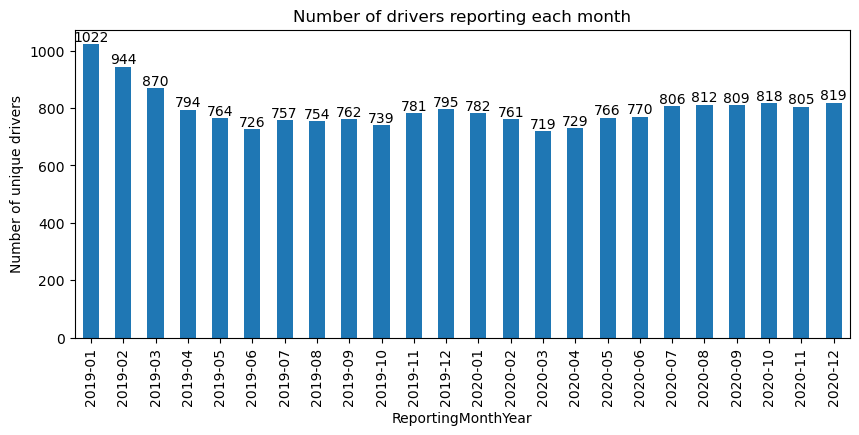

In [8]:
plt.figure(figsize=(10,4))
temp_df = df.groupby('ReportingMonthYear')['Driver_ID'].nunique()
ax = temp_df.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.ylabel('Number of unique drivers')
plt.title('Number of drivers reporting each month')
plt.show()

### Insight
- The **month** during which **maximum** number of **drivers reported is January 2019**. A total of **1022 drivers** reported on January 2019
- It then dropeed every month after January and has been stagnant at around 800 drivers reported every month

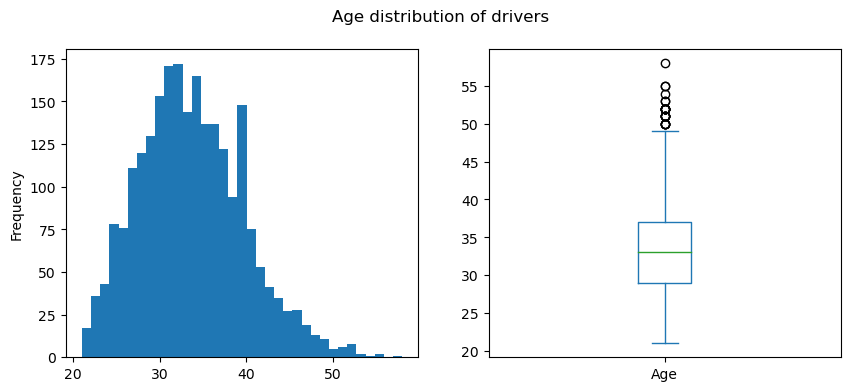

In [9]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
temp_df = df.groupby('Driver_ID').agg({'Age':'last'})['Age']
temp_df.plot(ax=axs[0], kind='hist', bins=35)
temp_df.plot(ax=axs[1], kind='box')
fig.suptitle('Age distribution of drivers')
plt.show()

### Insight
- There are drivers from different **age** groups ranging from **21 to 58 years**
- **Most** of the drivers are in the age group of **30 to 35**
- The distribution is mostly **normal** with **little skewness** towards the **right**

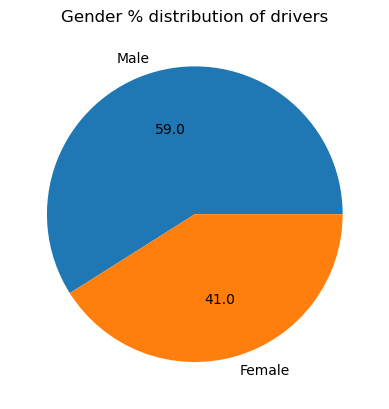

In [10]:
temp_df = df.groupby('Driver_ID').agg({'Gender':'first'})
temp_df['Gender'].value_counts().plot(kind='pie', autopct='%.1f')
plt.title('Gender % distribution of drivers')
plt.ylabel('')
plt.show()

### Insight
- **59%** of the drivers are **Male** and remaining **41%** are **Female**

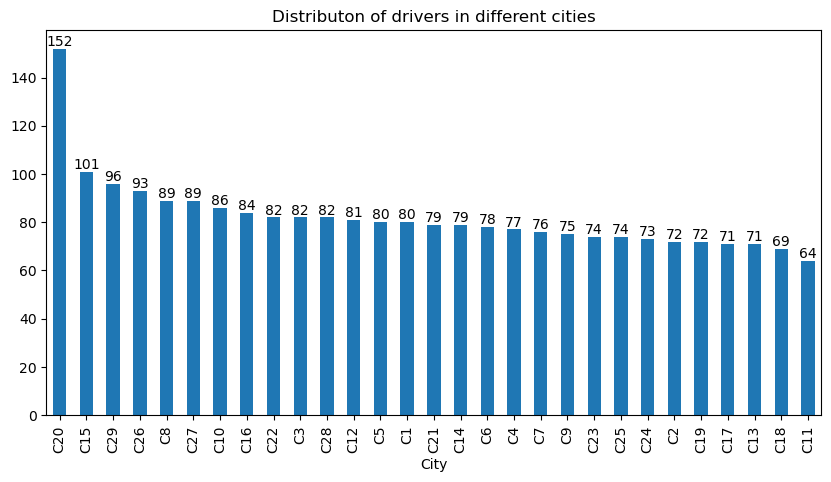

In [11]:
plt.figure(figsize=(10,5))
temp_df = df.groupby('Driver_ID').agg({'City':'first'})
ax = temp_df['City'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Distributon of drivers in different cities')
plt.show()

### Insight
- City **C20** has the **maximum** number of **drivers** followed by city C15 

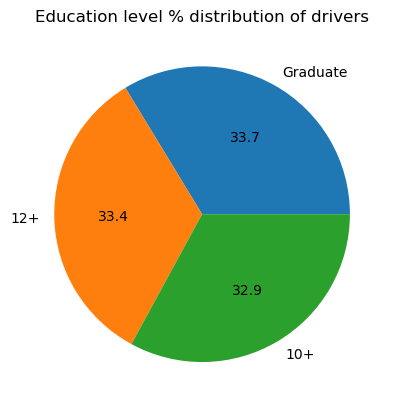

In [12]:
temp_df = df.groupby('Driver_ID').agg({'Education_Level':'first'})
temp_df['Education_Level'].value_counts().plot(kind='pie', autopct='%.1f')
plt.ylabel('')
plt.title('Education level % distribution of drivers')
plt.show()

### Insight
- Almost equal proportion of drivers are from the 3 different education level

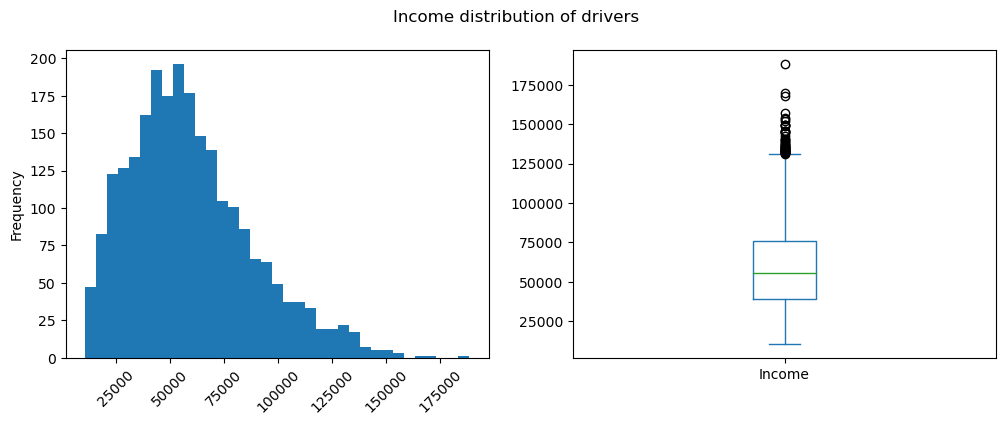

In [13]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
temp_df = df.groupby('Driver_ID').agg({'Income':'last'})['Income']
temp_df.plot(ax=axs[0], kind='hist', bins=35, rot=45)
temp_df.plot(ax=axs[1], kind='box')
fig.suptitle('Income distribution of drivers')
plt.show()

### Insight
- Most of the drivers have an average monthly income of **40k to 75k**
- The distribution is **right skewed**

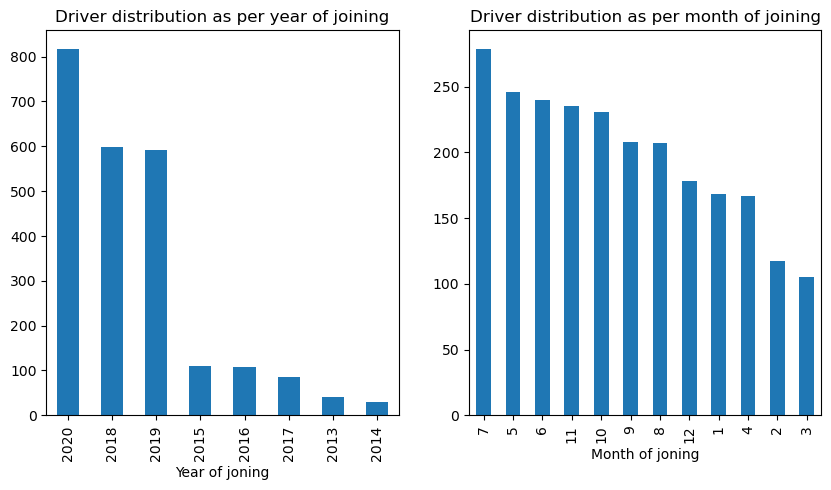

In [14]:
temp_df = df.groupby('Driver_ID').agg({'Dateofjoining':'first'})['Dateofjoining']
fig, axs = plt.subplots(1,2,figsize=(10,5))
temp_df.dt.year.value_counts().plot(kind='bar', ax=axs[0], xlabel='Year of joning', title='Driver distribution as per year of joining')
temp_df.dt.month.value_counts().plot(kind='bar', ax=axs[1], xlabel='Month of joning', title='Driver distribution as per month of joining')
plt.show()

### Insight
- Maximum number of drivers joined in the year **2020**
- Maximum number of drivers joined in the month of **July**

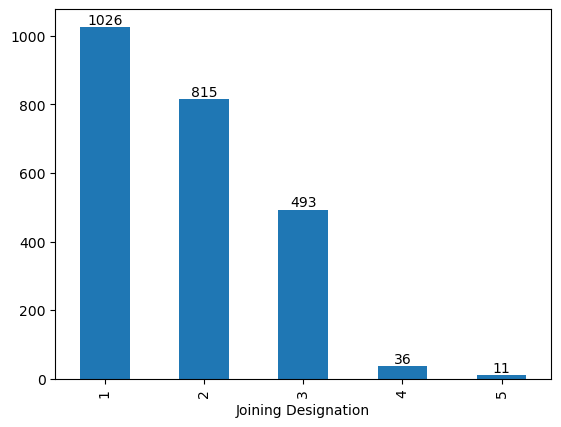

In [15]:
ax = df.groupby('Driver_ID').agg({'Joining Designation':'first'})['Joining Designation'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

### Insight
- Maximum number of drivers, 1026, have a **joining designation of 1**

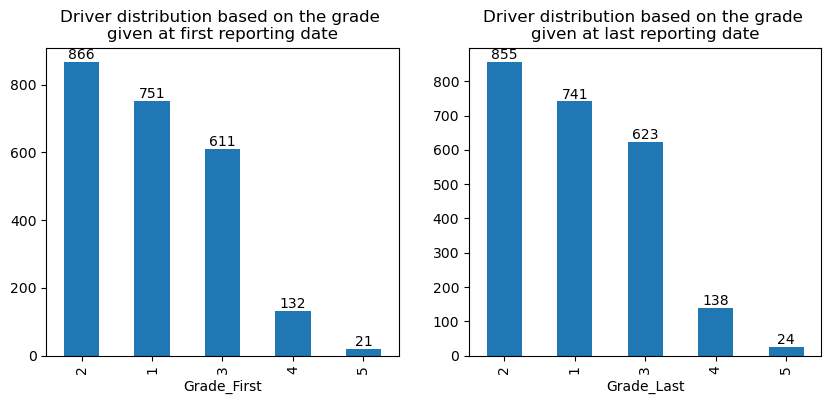

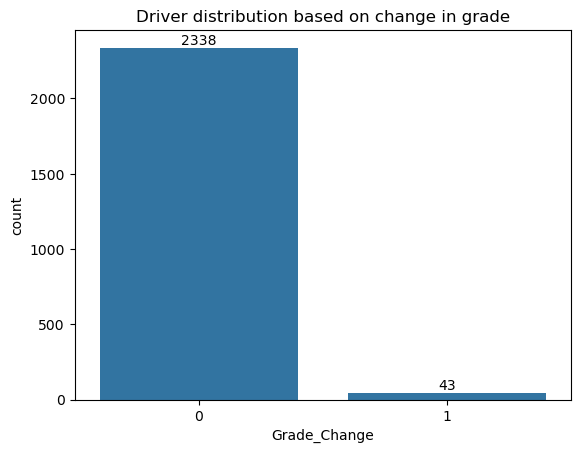

In [16]:
temp_df_1 = df.groupby('Driver_ID').agg({'Grade':'first'}).reset_index()
temp_df_1.rename(columns = {'Grade':'Grade_First'}, inplace=True)
temp_df_2 = df.groupby('Driver_ID').agg({'Grade':'last'}).reset_index()
temp_df_2.rename(columns = {'Grade':'Grade_Last'}, inplace=True)
temp_df = pd.merge(temp_df_1, temp_df_2, on='Driver_ID')
temp_df['Grade_Change'] = temp_df['Grade_Last'].astype('int') - temp_df['Grade_First'].astype('int')
fig, axs = plt.subplots(1,2,figsize=(10,4))
ax = temp_df['Grade_First'].value_counts().plot(kind='bar', ax=axs[0], title='Driver distribution based on the grade \ngiven at first reporting date')
ax.bar_label(ax.containers[0])
ax = temp_df['Grade_Last'].value_counts().plot(kind='bar', ax=axs[1], title='Driver distribution based on the grade \ngiven at last reporting date')
ax.bar_label(ax.containers[0])
plt.show()
ax = sns.countplot(data=temp_df, x = 'Grade_Change')
ax.set_title('Driver distribution based on change in grade')
ax.bar_label(ax.containers[0])
plt.show()

### Insight
- Maximum number of drivers have a **grade of 2** and it doesnt change for the majority of the drivers

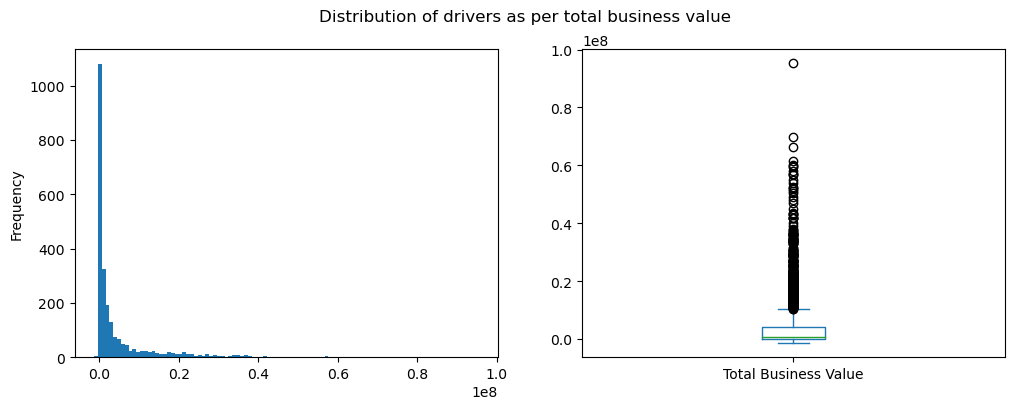

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
temp_df = df.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value']
temp_df.plot(ax=axs[0], kind='hist', bins=100)
temp_df.plot(ax=axs[1], kind='box')
fig.suptitle('Distribution of drivers as per total business value')
plt.show()

### Insight
- It is very evident that **many drivers** have a **total business value of 0** and there are also a few drivers who have a -ve business value
- The distribution is extremely **right skewed**

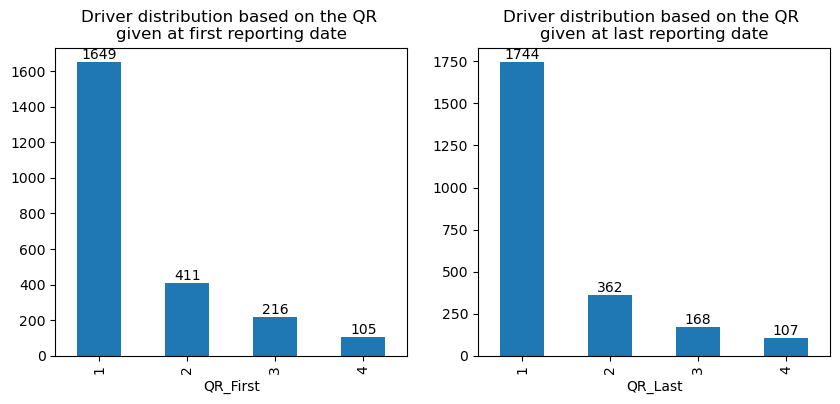

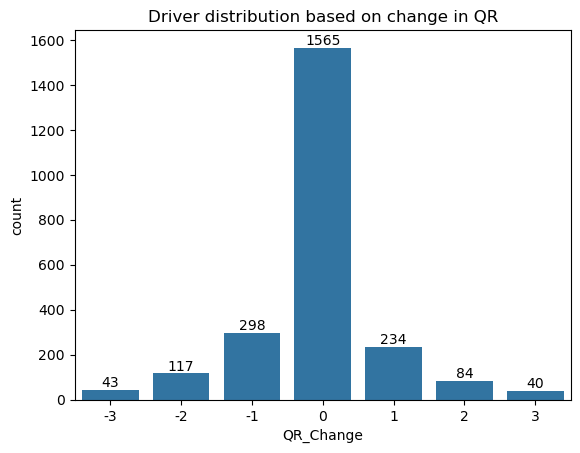

In [18]:
temp_df_1 = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'}).reset_index()
temp_df_1.rename(columns = {'Quarterly Rating':'QR_First'}, inplace=True)
temp_df_2 = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'}).reset_index()
temp_df_2.rename(columns = {'Quarterly Rating':'QR_Last'}, inplace=True)
temp_df = pd.merge(temp_df_1, temp_df_2, on='Driver_ID')
temp_df['QR_Change'] = temp_df['QR_Last'].astype('int') - temp_df['QR_First'].astype('int')
fig, axs = plt.subplots(1,2,figsize=(10,4))
ax = temp_df['QR_First'].value_counts().plot(kind='bar', ax=axs[0], title='Driver distribution based on the QR \ngiven at first reporting date')
ax.bar_label(ax.containers[0])
ax = temp_df['QR_Last'].value_counts().plot(kind='bar', ax=axs[1], title='Driver distribution based on the QR \ngiven at last reporting date')
ax.bar_label(ax.containers[0])
plt.show()
ax = sns.countplot(data=temp_df, x = 'QR_Change')
ax.set_title('Driver distribution based on change in QR')
ax.bar_label(ax.containers[0])
plt.show()

### Insight
- **Majority** of the drivers have a very **low quarterly rating of 1**
- The change in QR plot shows that **majority** of the drivers **don't see a change in their QR** but there are **decent number** of drivers with **positive change in QR** and equally decent number of drivers with **negative change in QR**
- There are **no drivers** with QR of **5**

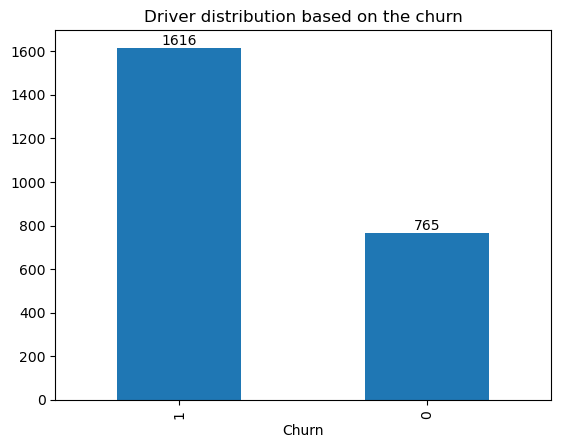

Churn
1    68.0
0    32.0
Name: proportion, dtype: float64

In [19]:
temp_df = df.groupby('Driver_ID').agg({'Churn':'first'})['Churn']
ax = temp_df.value_counts().plot(kind='bar', title='Driver distribution based on the churn')
ax.bar_label(ax.containers[0])
plt.show()
(temp_df.value_counts(normalize=True)*100).round(0)

### Insight
- **1616** drivers have **churned**, which is around **68%**

## 4.2. Bivariate analysis

In [22]:
driver_df = df.groupby('Driver_ID').agg({
    'ReportingMonthYear' : len,
    'Age' : 'last',
    'Gender' : 'first',
    'City' : 'first',
    'Education_Level' : 'first',
    'Income' : 'last',
    'Dateofjoining' : 'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' : 'first',
    'Grade' : 'last',
    'Total Business Value' : 'sum',
    'Quarterly Rating' : 'last',
    'Churn':'last'
}).reset_index()
driver_df.rename(columns={'ReportingMonthYear': 'Months of Service'}, inplace=True)
driver_df.head(10)

,Driver_ID,Months of Service,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn
0,1,3,28.0,Male,C23,Graduate,57387,2018-12-24,2019-11-03,1,1,1715580,2,1
1,2,2,31.0,Male,C7,Graduate,67016,2020-06-11,NaT,2,2,0,1,0
2,4,5,43.0,Male,C13,Graduate,65603,2019-07-12,2020-04-27,2,2,350000,1,1
3,5,3,29.0,Male,C9,10+,46368,2019-09-01,2019-07-03,1,1,120360,1,1
4,6,5,31.0,Female,C11,12+,78728,2020-07-31,NaT,3,3,1265000,2,0
5,8,3,34.0,Male,C2,10+,70656,2020-09-19,2020-11-15,3,3,0,1,1
6,11,1,28.0,Female,C19,Graduate,42172,2020-07-12,NaT,1,1,0,1,0
7,12,6,35.0,Male,C23,Graduate,28116,2019-06-29,2019-12-21,1,1,2607180,1,1
8,13,23,31.0,Male,C19,Graduate,119227,2015-05-28,2020-11-25,1,4,10213040,1,1
9,14,3,39.0,Female,C26,10+,19734,2020-10-16,NaT,3,3,0,1,0


In [23]:
drivers_with_2_year_service = driver_df[driver_df['Months of Service'] == 24]['Driver_ID'].reset_index(drop=True)

In [24]:
def calculate_change(df, column_name):
    temp_df_1 = df.groupby('Driver_ID').agg({column_name:'first'}).reset_index()
    first_column_name = column_name+'_First'
    temp_df_1.rename(columns = {column_name:first_column_name}, inplace=True)
    temp_df_2 = df.groupby('Driver_ID').agg({column_name:'last'}).reset_index()
    last_column_name = column_name+'_Last'
    temp_df_2.rename(columns = {column_name:last_column_name}, inplace=True)
    temp_df = pd.merge(temp_df_1, temp_df_2, on='Driver_ID')
    temp_df[column_name+'_Change'] = temp_df[last_column_name].astype('int') - temp_df[first_column_name].astype('int')
    temp_df.drop(columns=[first_column_name, last_column_name], inplace=True)
    return temp_df

In [25]:
column_name = 'Income'
temp_df1 = calculate_change(df, 'Income')
driver_df = pd.merge(driver_df, temp_df1, on='Driver_ID')
temp_df2 = calculate_change(df, 'Grade')
driver_df = pd.merge(driver_df, temp_df2, on='Driver_ID')
temp_df3 = calculate_change(df, 'Quarterly Rating')
driver_df = pd.merge(driver_df, temp_df3, on='Driver_ID')
driver_df['Quarterly Rating Improved'] = driver_df['Quarterly Rating_Change'].apply(lambda x: 1 if x>0 else 0)
driver_df.head()

,Driver_ID,Months of Service,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Income_Change,Grade_Change,Quarterly Rating_Change,Quarterly Rating Improved
0,1,3,28.0,Male,C23,Graduate,57387,2018-12-24,2019-11-03,1,1,1715580,2,1,0,0,0,0
1,2,2,31.0,Male,C7,Graduate,67016,2020-06-11,NaT,2,2,0,1,0,0,0,0,0
2,4,5,43.0,Male,C13,Graduate,65603,2019-07-12,2020-04-27,2,2,350000,1,1,0,0,0,0
3,5,3,29.0,Male,C9,10+,46368,2019-09-01,2019-07-03,1,1,120360,1,1,0,0,0,0
4,6,5,31.0,Female,C11,12+,78728,2020-07-31,NaT,3,3,1265000,2,0,0,0,1,1


In [26]:
driver_df['Income_Raise'] = driver_df['Income_Change'].apply(lambda x: 1 if x>0 else 0)

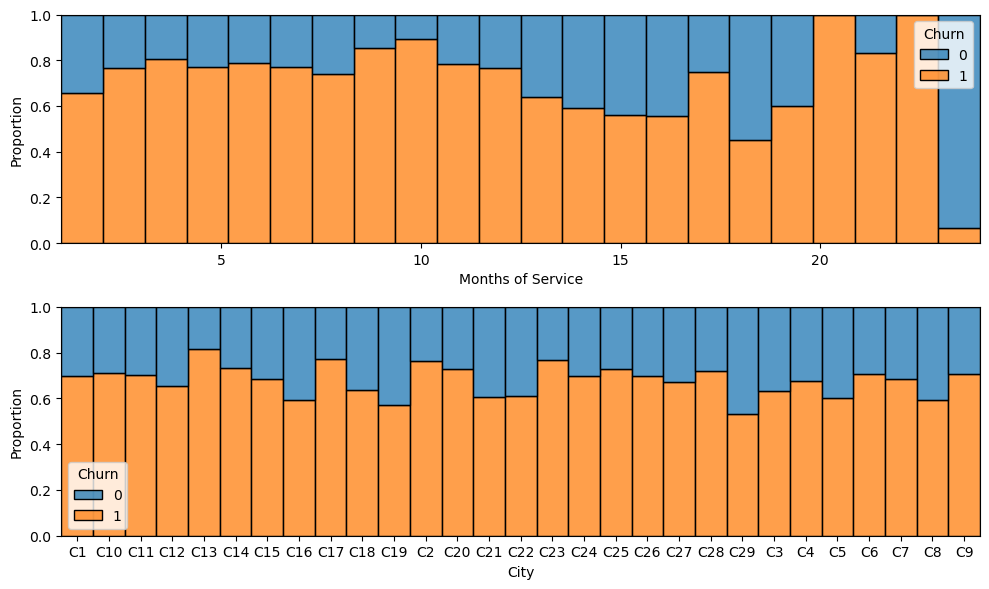

In [27]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
sns.histplot(ax = axs[0], data=driver_df, x='Months of Service', hue='Churn', stat="proportion", multiple="fill")
sns.histplot(ax = axs[1], data=driver_df, x='City', hue='Churn', stat="proportion", multiple="fill")
plt.tight_layout()
plt.show()

### Insight
- The **churn** rate is generally **higher** in drivers with **less months of service** and low in drivers with longer months of service with exception for 21, 22 and 23 months of service where the churn rates seems to be very high
- The city **C13** has the **highest churn rate** and city **C29** has the **lowest churn rate**

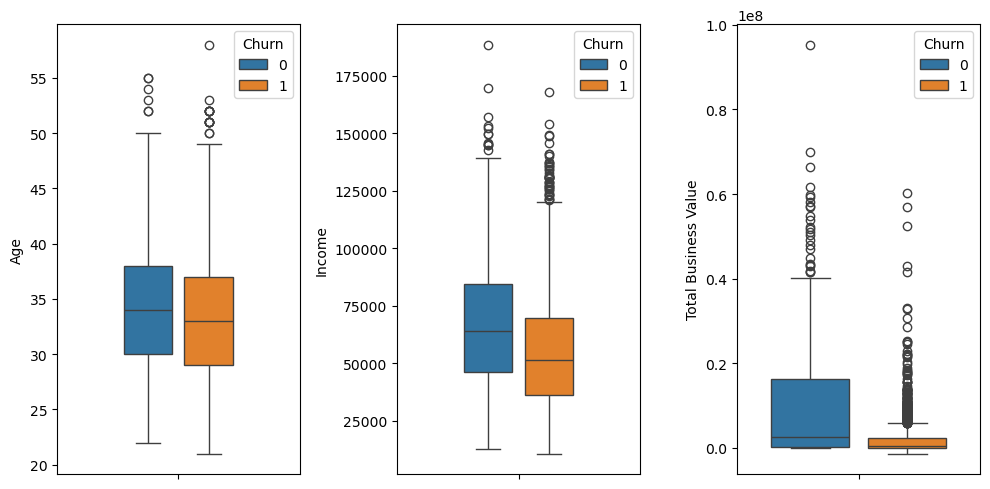

In [28]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
sns.boxplot(ax=axs[0], data=driver_df, y='Age', hue='Churn', width=0.5, gap=0.2)
sns.boxplot(ax=axs[1], data=driver_df, y='Income', hue='Churn', width=0.5, gap=0.2)
sns.boxplot(ax=axs[2], data=driver_df, y='Total Business Value', hue='Churn', gap=0.2)
plt.tight_layout()
plt.show()

### Insight
- The **median age** of drivers who have **churned** is **slighly lesser** than that of the drivers who have not churned
- The **median income** of drivers who have **churned** is **lesser** than that of the drivers who have not churned
- The **median Total Bussiness Value** of drivers who have **churned** is **lesser** than that of the drivers who have not churned
- The drivers who have **churned** also had **-ve Total Bussiness Value**

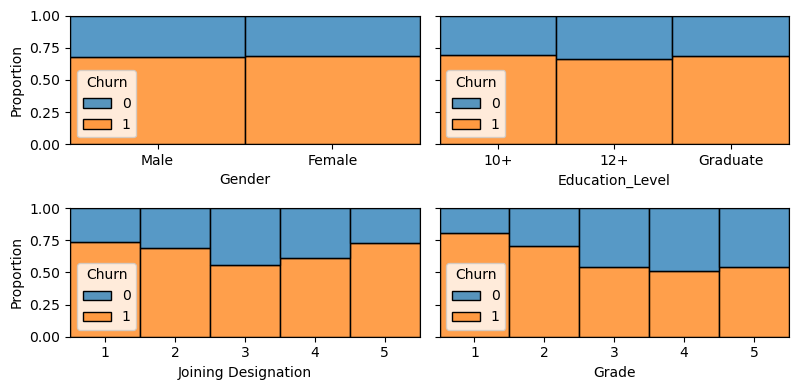

In [29]:
fig, axs = plt.subplots(2,2,figsize=(8,4),sharey=True)
sns.histplot(ax=axs[0,0], data=driver_df, x='Gender', hue='Churn', stat="proportion", multiple="fill")
sns.histplot(ax=axs[0,1], data=driver_df, x='Education_Level', hue='Churn', stat='proportion', multiple='fill')
sns.histplot(ax=axs[1,0], data=driver_df, x='Joining Designation', hue='Churn', stat='proportion', multiple='fill')
sns.histplot(ax=axs[1,1], data=driver_df, x='Grade', hue='Churn', stat='proportion', multiple='fill')
plt.tight_layout()
plt.show()

### Insight
- The **churn** rate is **almost equal** in both **male and female** drivers
- The **churn** rate is **almost equal** in **10+ and Graduates** and slighly **lower** in **12+**
- The **churn** rate is **less** for **joining designation 3**
- The **churn** rate is **less** for **higher grades**

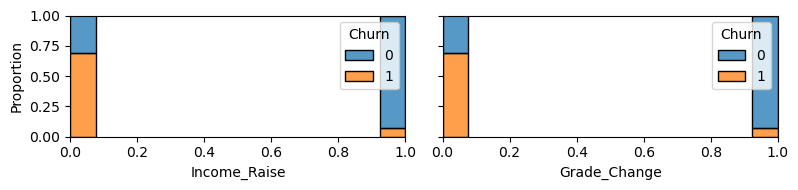

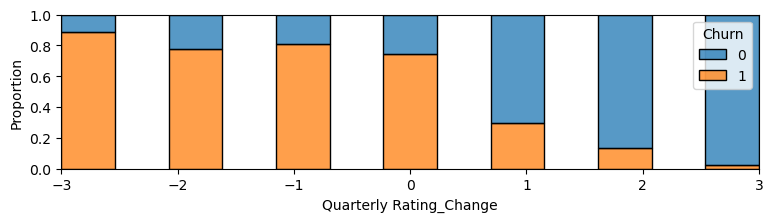

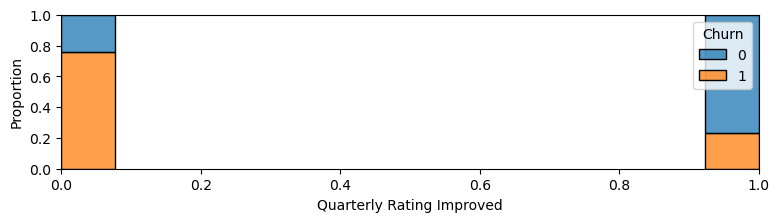

In [30]:
fig, axs = plt.subplots(1,2,figsize=(8,2),sharey=True)
sns.histplot(ax=axs[0], data=driver_df, x='Income_Raise', hue='Churn', stat='proportion', multiple='fill')
sns.histplot(ax=axs[1], data=driver_df, x='Grade_Change', hue='Churn', stat='proportion', multiple='fill')
plt.tight_layout()
plt.show()
plt.figure(figsize=(9,2))
sns.histplot(data=driver_df, x='Quarterly Rating_Change', hue='Churn', stat='proportion', multiple='fill')
plt.show()
plt.figure(figsize=(9,2))
sns.histplot(data=driver_df, x='Quarterly Rating Improved', hue='Churn', stat='proportion', multiple='fill')
plt.show()

### Insight
- The **churn rate** is **very less** in drivers whose **income has raised**
- The **churn rate** is **very less** in drivers whose **grade has raised**
- The **churn rate** is **very less** in drivers whose **Quarterly rating has increased**

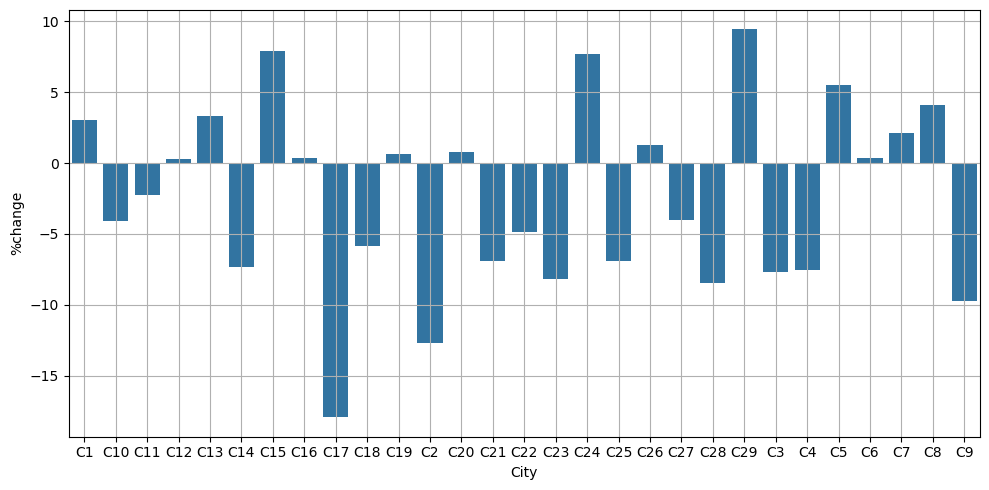

In [31]:
temp_df = df.groupby(['City', 'ReportingYear']).agg({'Quarterly Rating': 'mean'}).reset_index()
temp_df1 = pd.pivot_table(data=temp_df, index='City', columns='ReportingYear', values='Quarterly Rating').reset_index()
temp_df1.rename(columns={'ReportingYear':'index', 2019:'2019', 2020:'2020'}, inplace=True)
temp_df1['%change'] = (((temp_df1['2020'] - temp_df1['2019'])/temp_df1['2019'])*100).round(2)
plt.figure(figsize=(10,5))
sns.barplot(data=temp_df1, x='City', y='%change')
plt.tight_layout()
plt.grid(True)
plt.show()

### Insight
- The city **C29** shows  most improvement in Quarterly Rating in 2020 compared to 2019

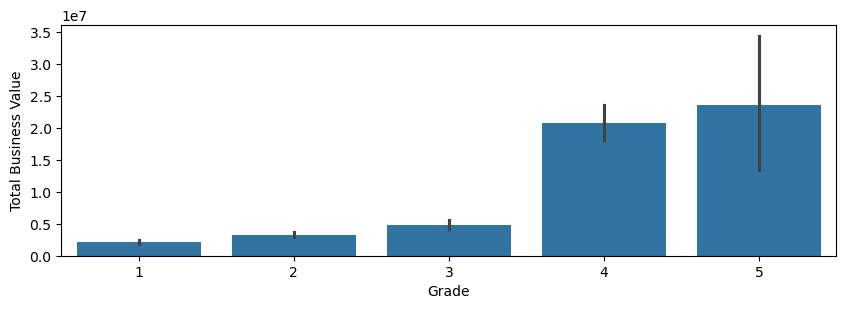

Mean of Total Business Value of drivers with grade 5: 565760460


In [32]:
plt.figure(figsize=(10,3))
sns.barplot(data=driver_df, x='Grade', y='Total Business Value', estimator='mean')
plt.show()
print('Mean of Total Business Value of drivers with grade 5:', driver_df[driver_df['Grade'] == 5]['Total Business Value'].sum())

### Insight
- The mean of Total Business Value of drivers with grade 5 is higher than those with other grades

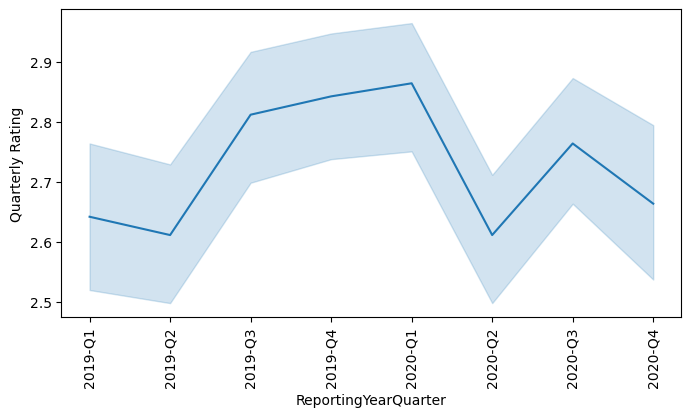

In [33]:
def convert_to_year_quarter(x):
    year = str(x.year)
    month = x.month
    if(month >=1 and month <=3):
        return year+'-Q1'
    elif(month >=4 and month <=6):
        return year+'-Q2'
    elif(month >=7 and month <=9):
        return year+'-Q3'
    else:
        return year+'-Q4'
    
temp_df = df.copy()
temp_df['ReportingYearQuarter']=temp_df['ReportingMonthYear'].apply(convert_to_year_quarter)
temp_df.head()
temp_driver_full_service_df = temp_df[temp_df['Driver_ID'].isin(drivers_with_2_year_service)].groupby(['Driver_ID', 'ReportingYearQuarter']).agg({'Quarterly Rating':'last', 'Total Business Value':'sum'}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=temp_driver_full_service_df, x='ReportingYearQuarter', y='Quarterly Rating')
plt.xticks(rotation=90)
plt.show()

### Insight
- There is a dip in the quarterly rating in Q2 and then it increases in Q3.
- This pattern can be osberved for both the years

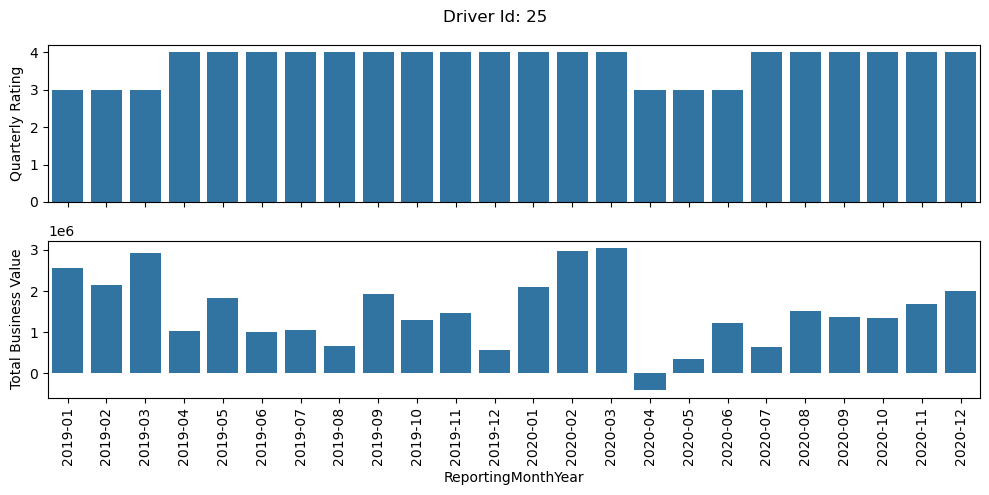

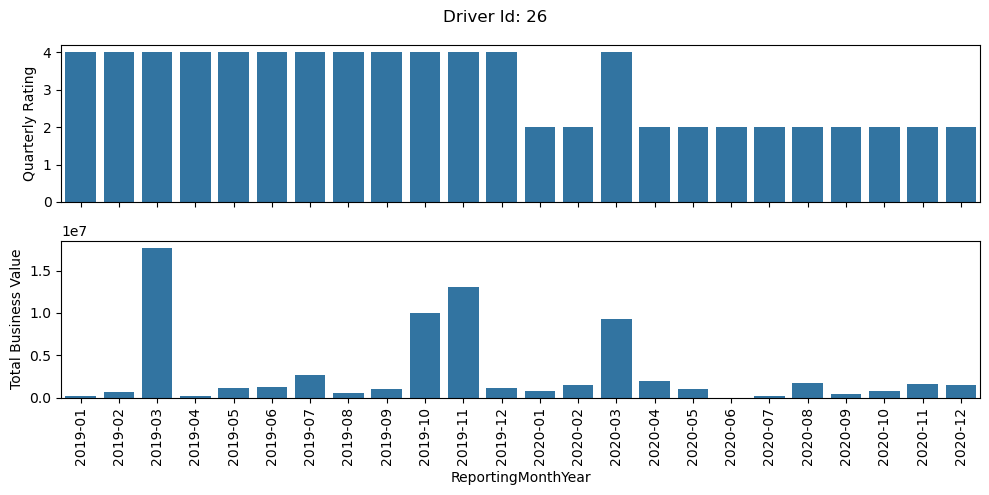

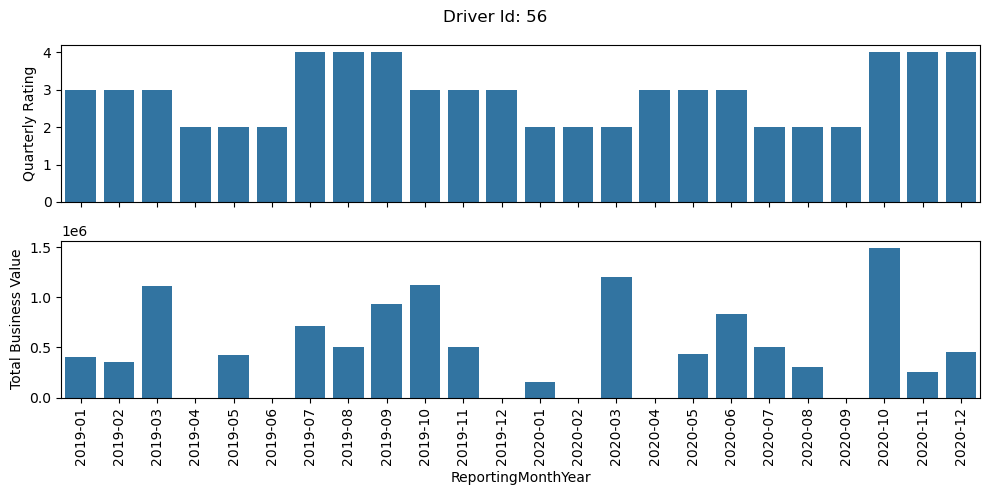

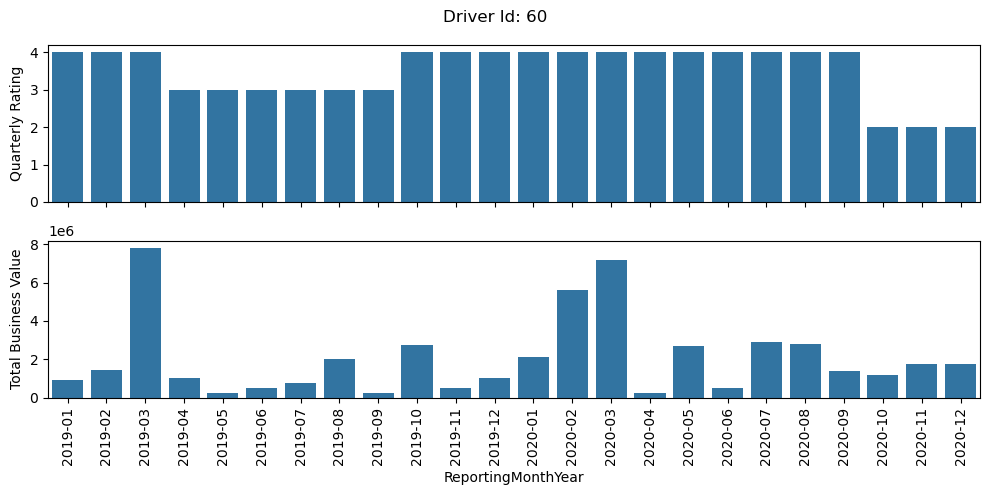

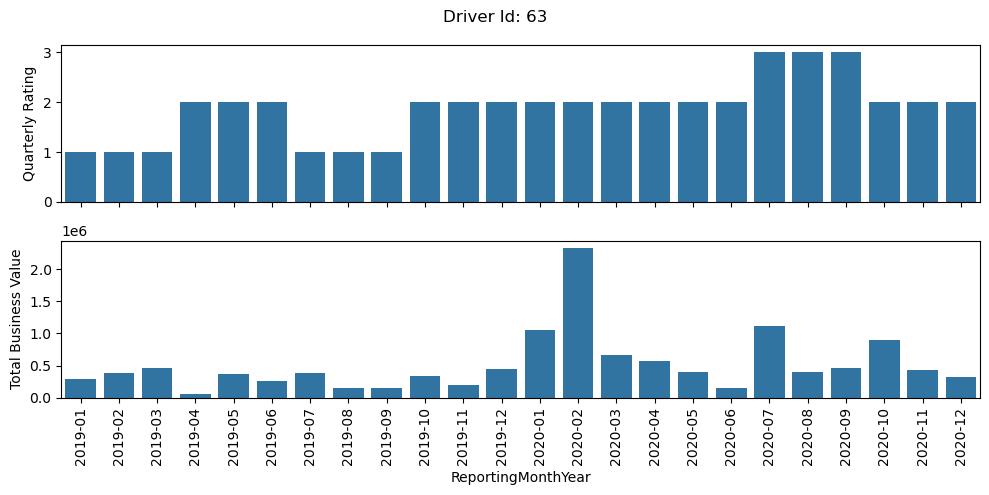

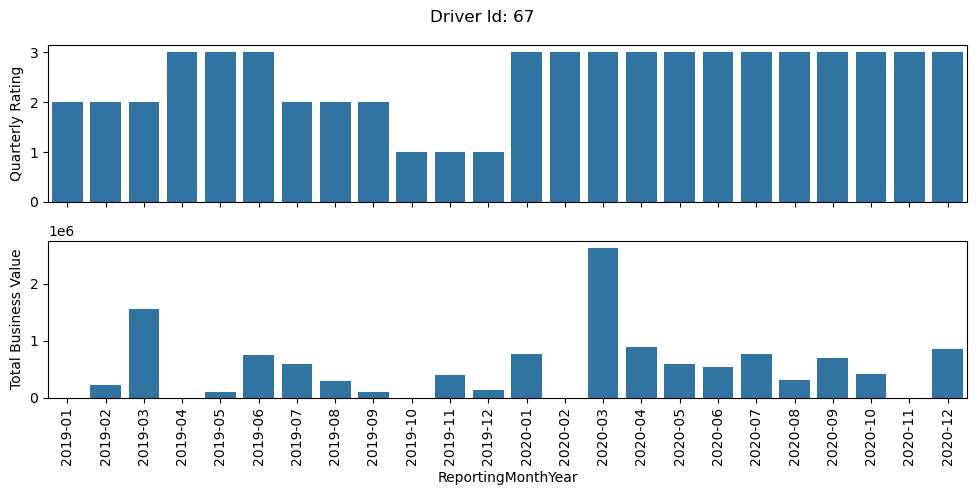

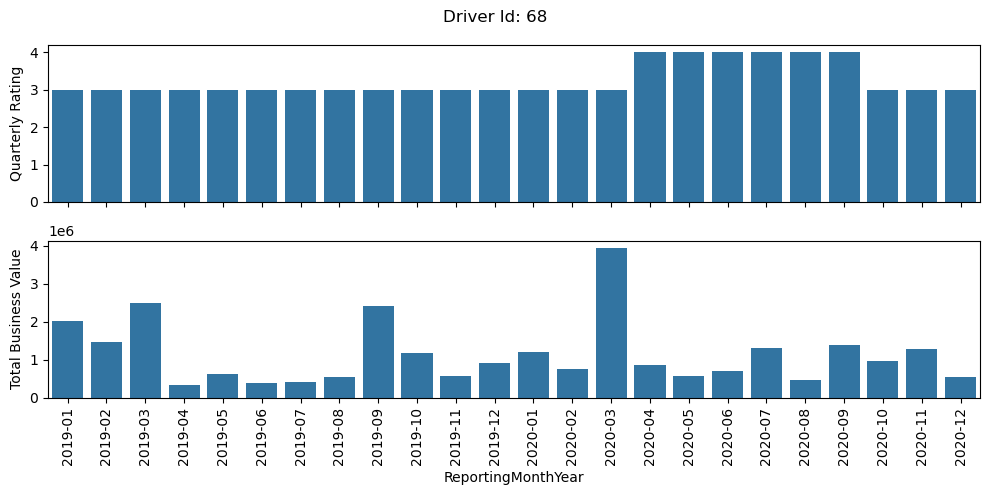

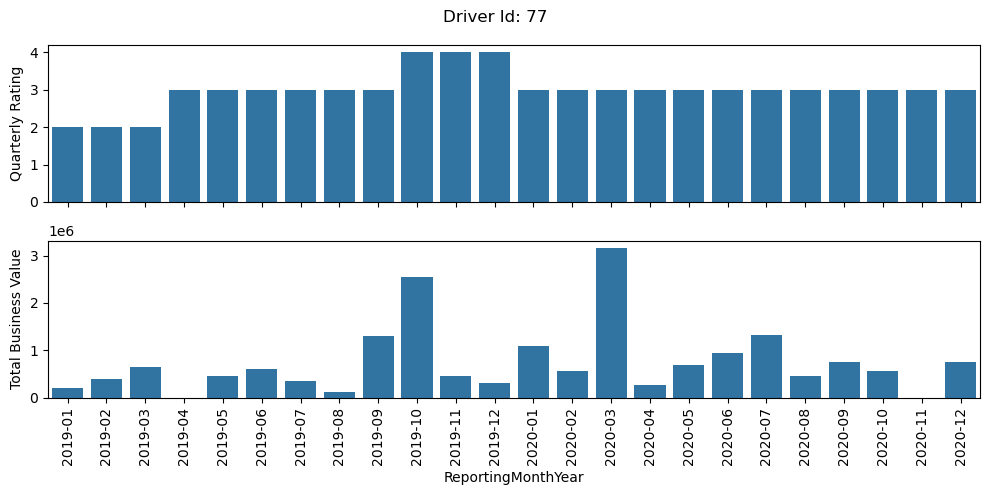

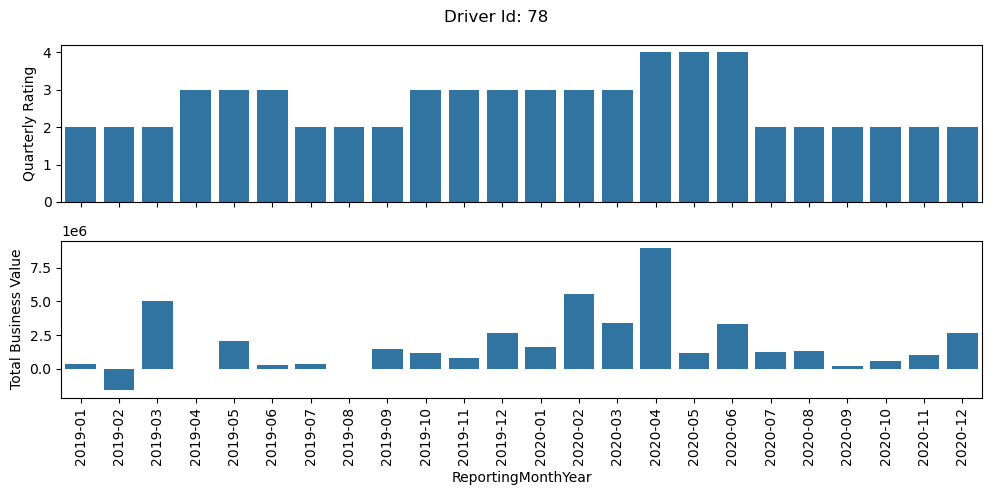

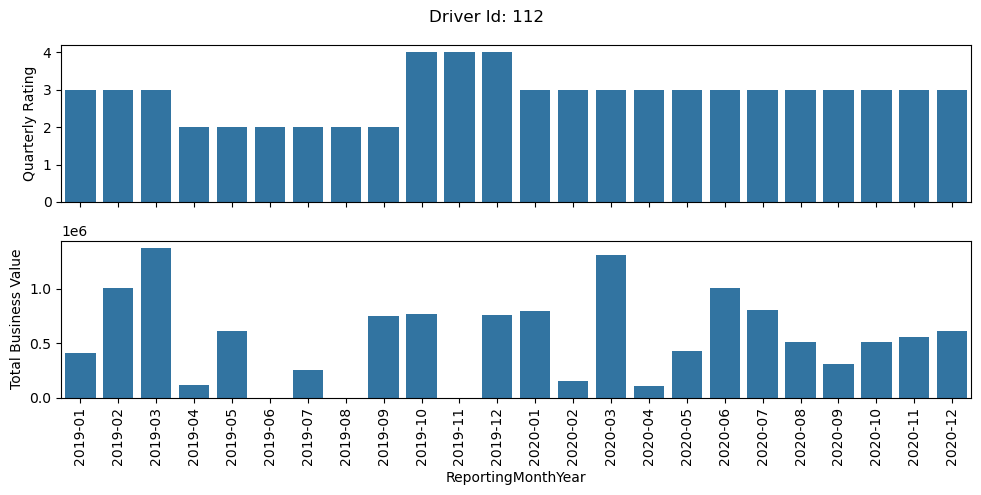

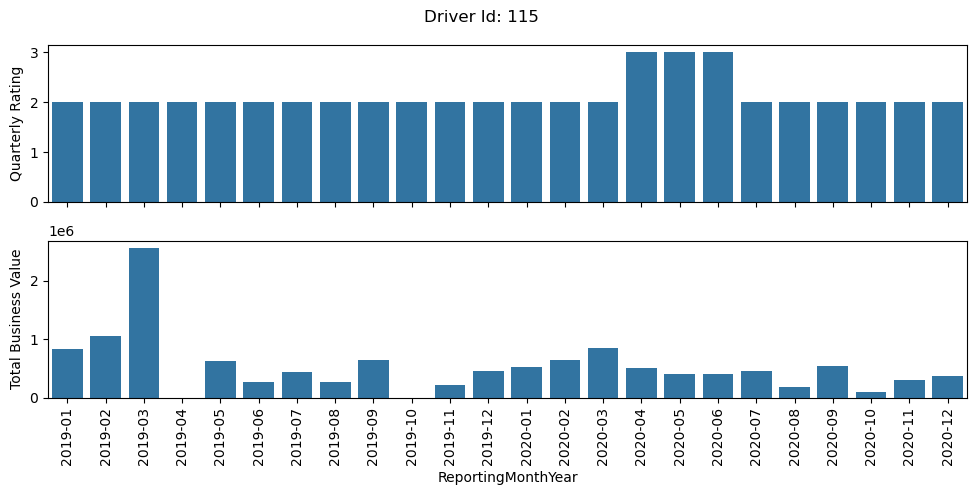

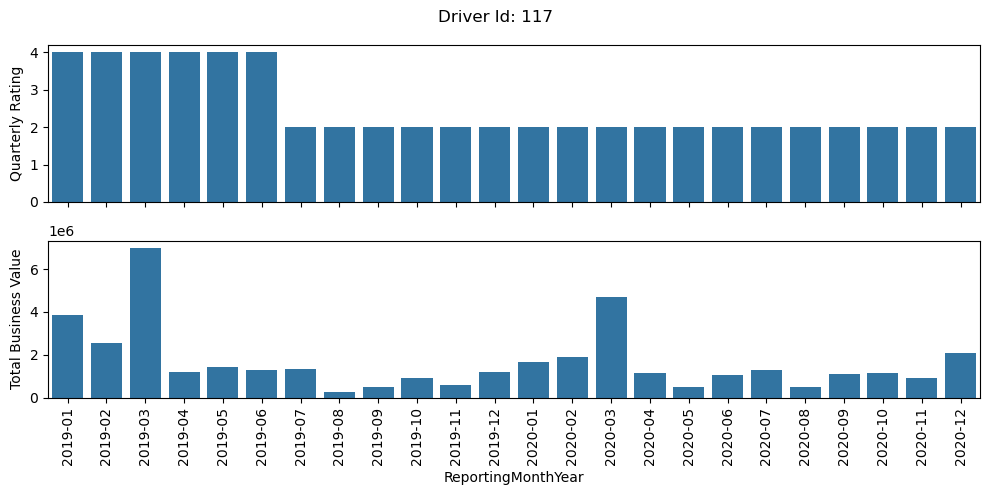

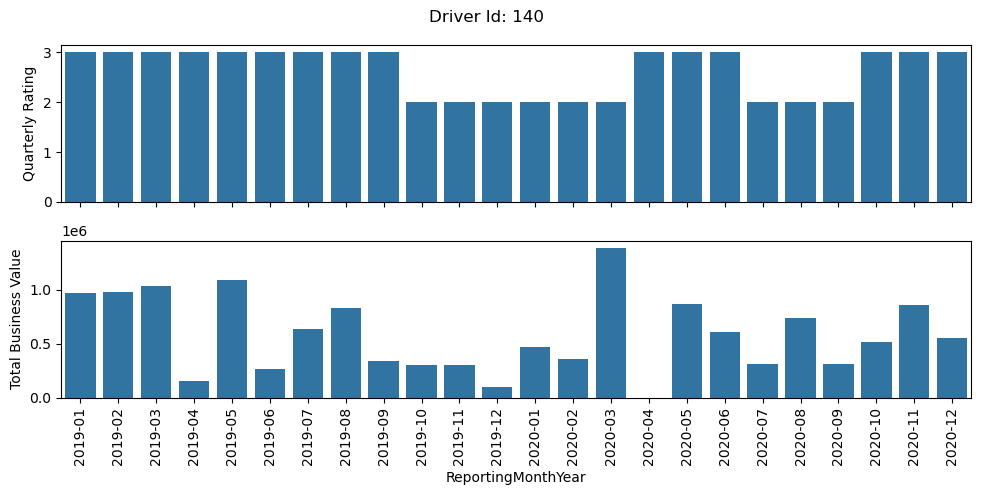

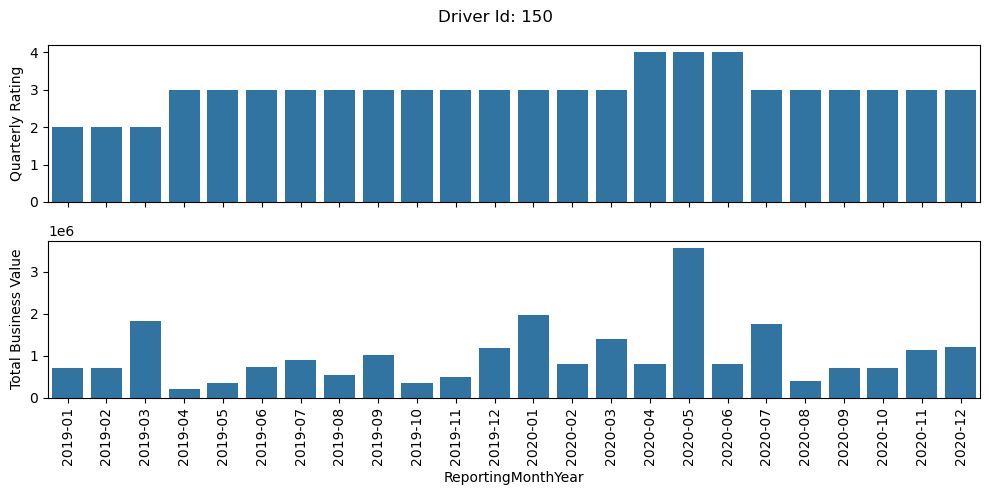

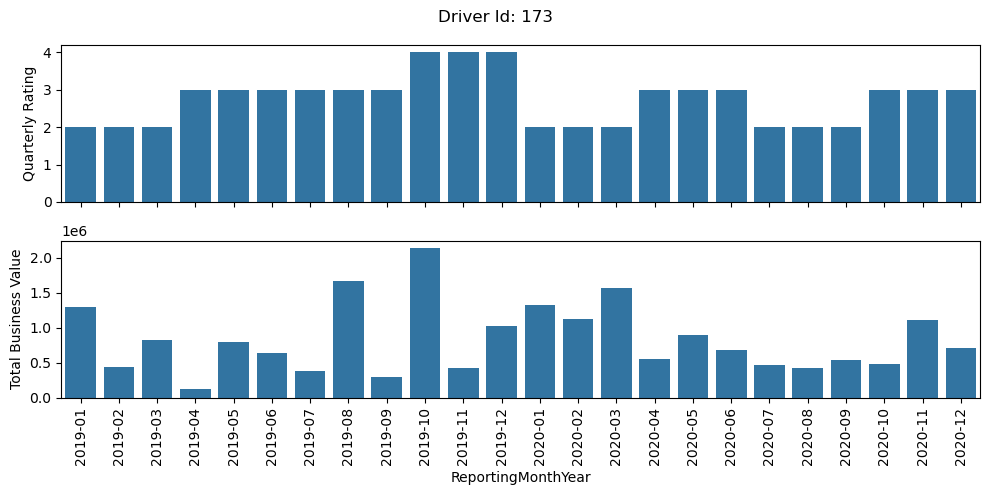

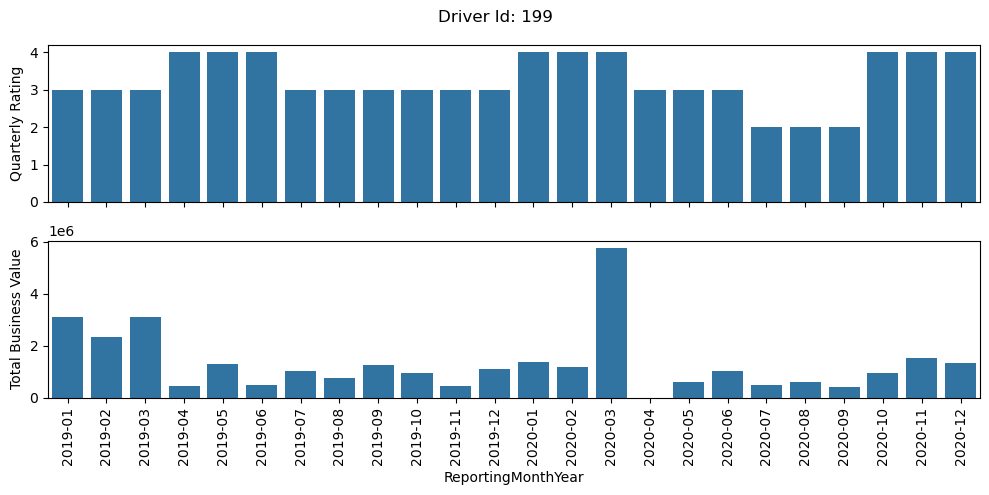

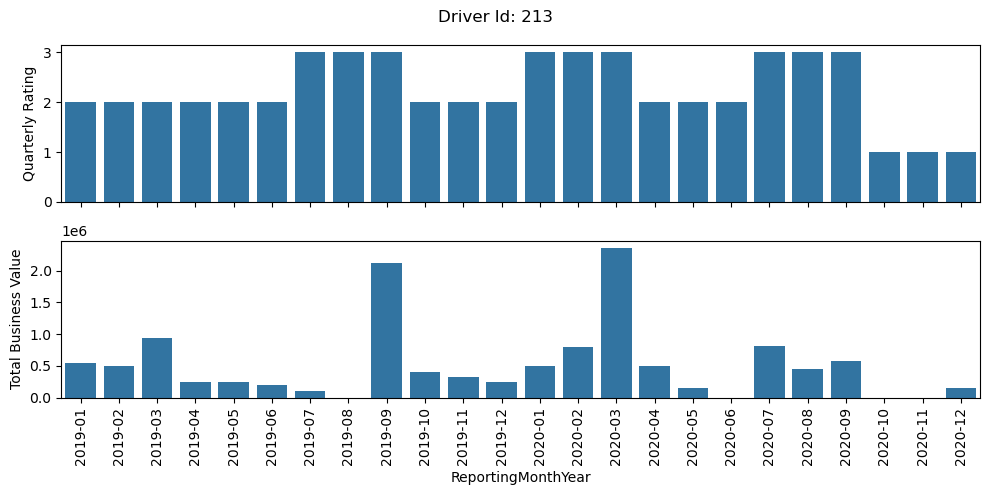

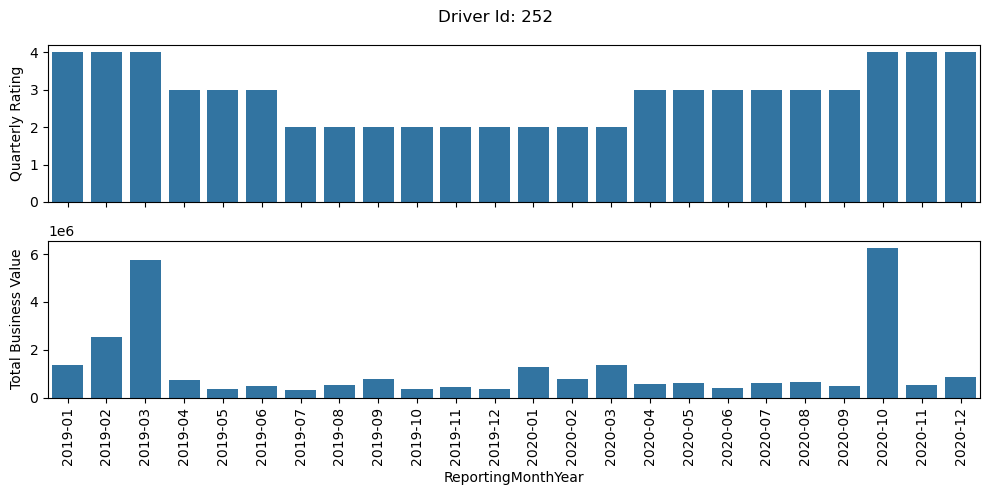

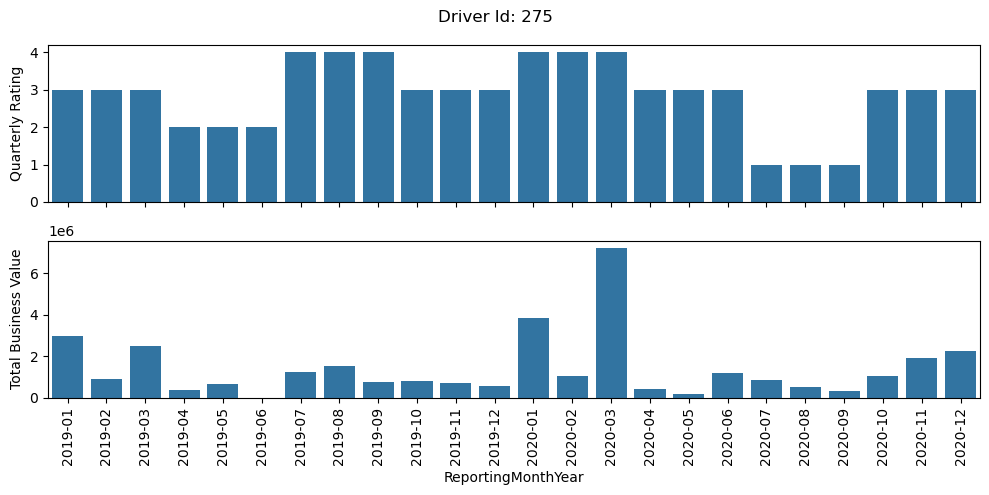

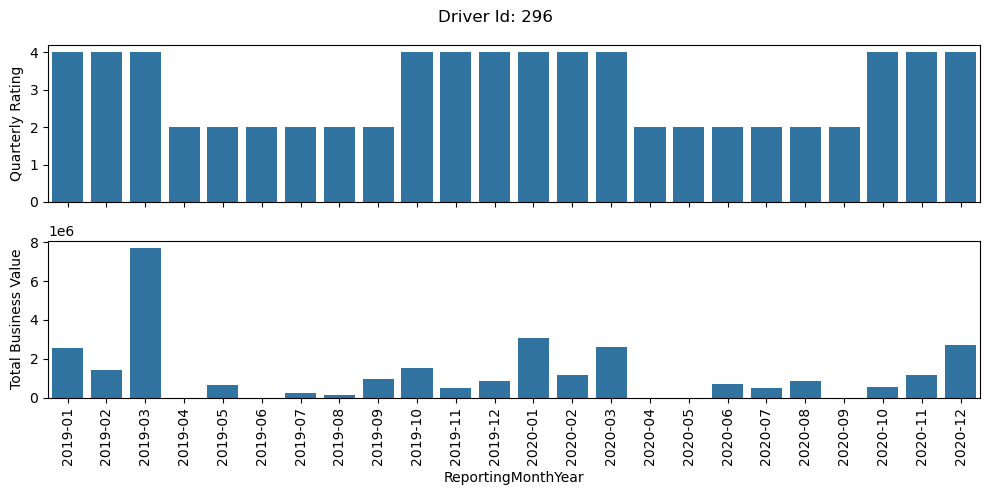

In [34]:
temp_driver_full_service_df = temp_df[temp_df['Driver_ID'].isin(drivers_with_2_year_service)]
num_of_drivers = 20
count=0
for driver_id in temp_driver_full_service_df['Driver_ID'].unique():
    if(count < num_of_drivers):
        count = count + 1
        sample_df = temp_driver_full_service_df[temp_driver_full_service_df['Driver_ID'] == driver_id]
        fig, axs = plt.subplots(2,1,figsize=(10, 5), sharex=True)
        sns.barplot(ax=axs[0], data=sample_df, x = 'ReportingMonthYear', y='Quarterly Rating')
        axs[0].tick_params(axis='x', rotation=90)
        sns.barplot(ax=axs[1], data=sample_df, x = 'ReportingMonthYear', y='Total Business Value')
        axs[1].tick_params(axis='x', rotation=90)
        fig.suptitle(f'Driver Id: {driver_id}')
        plt.tight_layout()
        plt.show()
    else:
        break

### Insight
- It can be observed that a significant drop in rating impacts the Total Business Value. Drop in rating demotivates the drivers, leading to accepting only a few rides or in somecases not accepting any rides and hence impacting the Total Business Value

## 4.3. Multivariate analysis

In [35]:
driver_df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
driver_df['Education_Level'].replace({'Graduate':0, '10+':1, '12+':2}, inplace=True)
driver_df['City'] = driver_df['City'].str[1:]

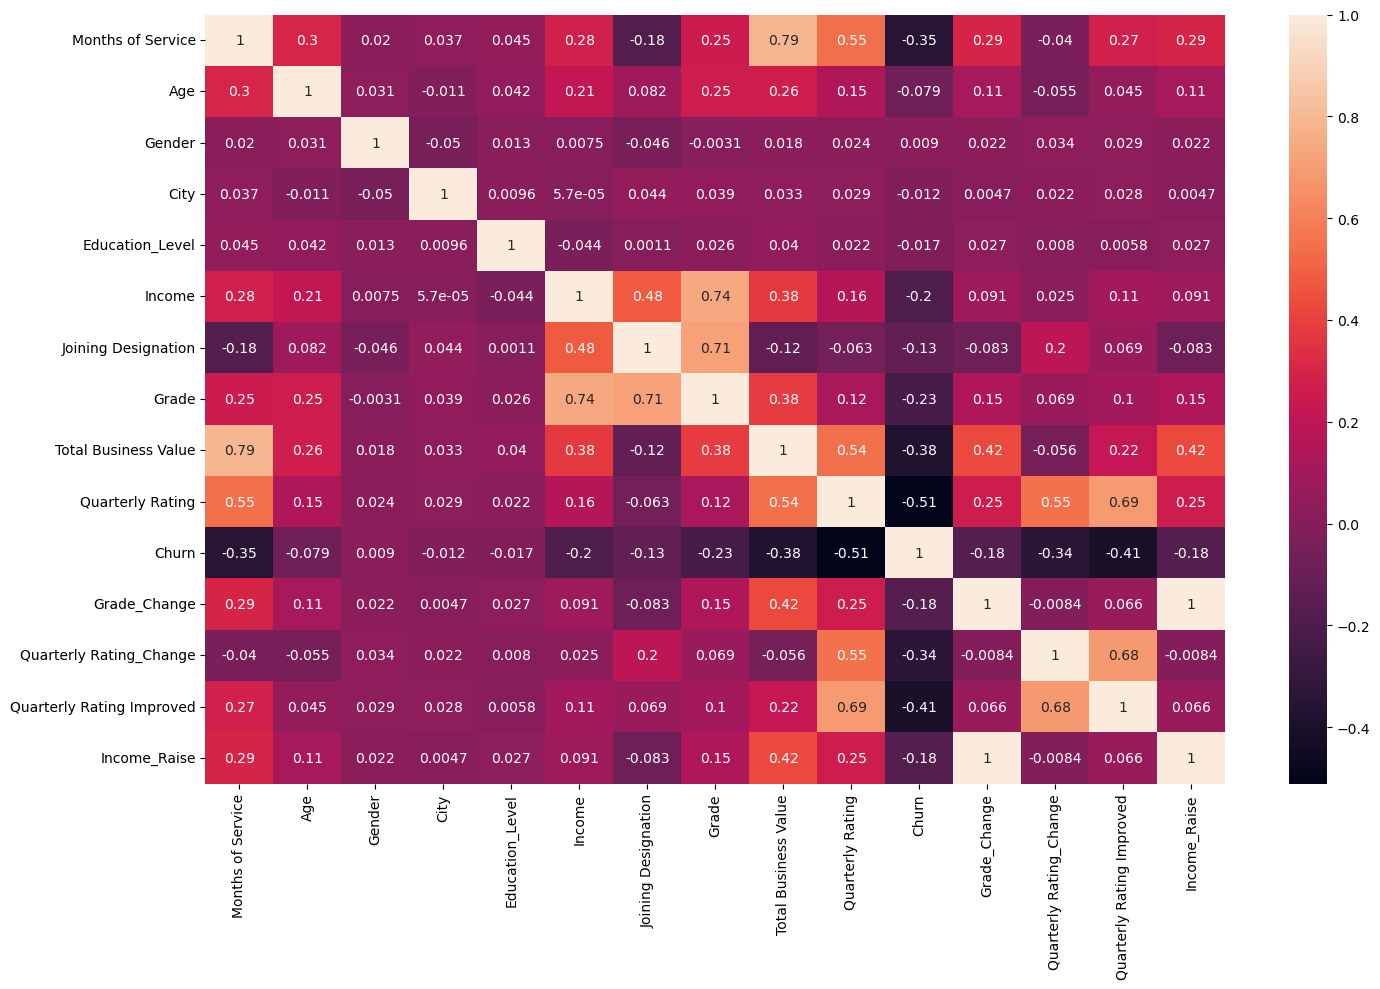

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(driver_df.drop(columns=['Driver_ID', 'Dateofjoining', 'LastWorkingDate', 'Income_Change']).corr(), annot=True)
plt.tight_layout()
plt.show()

### Insight
- **Months of Service** and **Total Business Value** are highly correlated
- **Income** and **Grade** are highly correlated
- **Joining Designation** and **Grade** are highly correlated
- **Quarterly Rating** and **Months of Service** are highly correlated
- **Chrun** is decently correlated with **Quarterly Rating, Total Business Value, Months of Service**

# 5. Data Preprocessing

In [37]:
driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Driver_ID                  2381 non-null   int64         
 1   Months of Service          2381 non-null   int64         
 2   Age                        2381 non-null   float64       
 3   Gender                     2381 non-null   category      
 4   City                       2381 non-null   object        
 5   Education_Level            2381 non-null   category      
 6   Income                     2381 non-null   int64         
 7   Dateofjoining              2381 non-null   datetime64[ns]
 8   LastWorkingDate            1616 non-null   datetime64[ns]
 9   Joining Designation        2381 non-null   category      
 10  Grade                      2381 non-null   category      
 11  Total Business Value       2381 non-null   int64         
 12  Quarte

### Insight
- The columns **Driver_ID, Gender, City, Education_Level, Dateofjoining, LastWorkingDate** can be dropped as they do not contribute towards the driver churn rate

In [38]:
driver_df.drop(columns=['Driver_ID', 'Gender', 'City', 'Education_Level', 'Dateofjoining', 'LastWorkingDate', 'Income_Change'], inplace=True)
driver_df['Quarterly Rating'] = driver_df['Quarterly Rating'].astype('category')
driver_df['Churn'] = driver_df['Churn'].astype('category')
driver_df['Grade_Change'] = driver_df['Grade_Change'].astype('category')
driver_df['Quarterly Rating_Change'] = driver_df['Quarterly Rating_Change'].astype('category')
driver_df['Income_Raise'] = driver_df['Income_Raise'].astype('category')
driver_df.head()

,Months of Service,Age,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Grade_Change,Quarterly Rating_Change,Quarterly Rating Improved,Income_Raise
0,3,28.0,57387,1,1,1715580,2,1,0,0,0,0
1,2,31.0,67016,2,2,0,1,0,0,0,0,0
2,5,43.0,65603,2,2,350000,1,1,0,0,0,0
3,3,29.0,46368,1,1,120360,1,1,0,0,0,0
4,5,31.0,78728,3,3,1265000,2,0,0,1,1,0


In [39]:
driver_df.duplicated().value_counts()

False    2381
Name: count, dtype: int64

### Insight
- There are no duplicates

## 5.1. Handling null values

In [40]:
driver_df.isna().sum()

Months of Service            0
Age                          0
Income                       0
Joining Designation          0
Grade                        0
Total Business Value         0
Quarterly Rating             0
Churn                        0
Grade_Change                 0
Quarterly Rating_Change      0
Quarterly Rating Improved    0
Income_Raise                 0
dtype: int64

### Insight
- There are **no missing data or null values**

## 5.2. Outlier Treatment

In [41]:
# helper function to detect outliers using IQR method
def detectOutliers_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

# helper function to detect outliers using standard deviation method
def detectOutliers_std(df):
    mean = df.mean()
    std = df.std()
    upper_limit = mean+(3*std)
    lower_limit = mean-(3*std)
    lower_outliers = df[df<lower_limit]
    higher_outliers = df[df>upper_limit]
    return lower_outliers, higher_outliers

In [42]:
numerical_columns = driver_df.select_dtypes(include=np.number).columns
column_outlier_dictionary = {}
for column in numerical_columns:
    lower_outliers, higher_outliers = detectOutliers_iqr(driver_df[column])
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]
    #print('*'*50)
    #print(f'Outliers of \'{column}\' column are:')
    #print("Lower outliers:\n", lower_outliers)
    #print("Higher outliers:\n", higher_outliers)    
    #print('*'*50, end="\n")

In [43]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'Months of Service' has 249 outliers
The column 'Age' has 25 outliers
The column 'Income' has 48 outliers
The column 'Total Business Value' has 336 outliers
The column 'Quarterly Rating Improved' has 358 outliers


In [44]:
numerical_columns = driver_df.select_dtypes(include=np.number).columns
column_outlier_dictionary = {}
for column in numerical_columns:
    lower_outliers, higher_outliers = detectOutliers_std(driver_df[column])
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]
    #print('*'*50)
    #print(f'Outliers of \'{column}\' column are:')
    #print("Lower outliers:\n", lower_outliers)
    #print("Higher outliers:\n", higher_outliers)    
    #print('*'*50, end="\n")

In [45]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'Months of Service' has 0 outliers
The column 'Age' has 14 outliers
The column 'Income' has 16 outliers
The column 'Total Business Value' has 64 outliers
The column 'Quarterly Rating Improved' has 0 outliers


### Insight
- I will **keep the outliers** in **Age** and **Income** columns as they are less in number
- I will **cap the outliers** in **Total Business Value** column as drivers with higher business value do not churn usually

In [46]:
mean = driver_df['Total Business Value'].mean()
std = driver_df['Total Business Value'].std()
upper_limit = mean+(3*std)
driver_df['Total Business Value'] = driver_df['Total Business Value'].apply(lambda x: x if x <= upper_limit else upper_limit)

## 5.3. Multicollinearity Check

In [47]:
features_df = driver_df.drop(columns=['Churn']) # Drop target column
features_df = features_df.drop(columns=features_df.select_dtypes(include='category').columns) # Drop category columns
features_df = sm.add_constant(features_df)  # Adding a constant column for the intercept
vif_df = pd.DataFrame()
vif_df['Features'] = features_df.columns
vif_df['VIF'] = [variance_inflation_factor(features_df.values, idx) for idx in range(len(features_df.columns))]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df             

,Features,VIF
0,const,36.42
4,Total Business Value,3.99
1,Months of Service,3.83
3,Income,1.19
2,Age,1.12
5,Quarterly Rating Improved,1.09


## Insight
- Based on the above VIF scores, I can conclude that there are no multicolinear numerical features

## 5.4. Encode categorical variables

In [48]:
final_df = driver_df.copy()

**Sepearte out target and feature columns**

In [49]:
X = final_df.drop(columns=['Churn'])
y = final_df['Churn']
X.shape, y.shape

((2381, 11), (2381,))

**Encode target variable**

In [50]:
y = y.astype(int)

**Encode features with just 2 classes as 0 or 1**

In [51]:
X[['Grade_Change','Quarterly Rating_Change', 'Income_Raise']] = X[['Grade_Change','Quarterly Rating_Change', 'Income_Raise']].astype('int8')

**One-Hot-Encoding for remaining categorical features**

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Months of Service          2381 non-null   int64   
 1   Age                        2381 non-null   float64 
 2   Income                     2381 non-null   int64   
 3   Joining Designation        2381 non-null   category
 4   Grade                      2381 non-null   category
 5   Total Business Value       2381 non-null   float64 
 6   Quarterly Rating           2381 non-null   category
 7   Grade_Change               2381 non-null   int8    
 8   Quarterly Rating_Change    2381 non-null   int8    
 9   Quarterly Rating Improved  2381 non-null   int64   
 10  Income_Raise               2381 non-null   int8    
dtypes: category(3), float64(2), int64(3), int8(3)
memory usage: 107.7 KB


In [53]:
categorical_columns = X.select_dtypes(include='category').columns
categorical_columns

Index(['Joining Designation', 'Grade', 'Quarterly Rating'], dtype='object')

In [54]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(X[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_columns))
X = pd.concat([X, encoded_df], axis=1)
X.drop(columns = categorical_columns, inplace=True)
X.head()

,Months of Service,Age,Income,Total Business Value,Grade_Change,Quarterly Rating_Change,Quarterly Rating Improved,Income_Raise,Joining Designation_1,Joining Designation_2,...,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Quarterly Rating_1,Quarterly Rating_2,Quarterly Rating_3,Quarterly Rating_4
0,3,28.0,57387,1715580.0,0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,31.0,67016,0.0,0,0,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5,43.0,65603,350000.0,0,0,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,29.0,46368,120360.0,0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,31.0,78728,1265000.0,0,1,1,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# 6. Model building

## 6.1. Train-test split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 22), (477, 22), (1904,), (477,))

## 6.2. Perform data normalization/standardization
Data normalization/standardization is required so that features with higher scales do not dominate the model's performance. Hence all features should have same scale

**Data before scaling**

In [56]:
X_train.head()

,Months of Service,Age,Income,Total Business Value,Grade_Change,Quarterly Rating_Change,Quarterly Rating Improved,Income_Raise,Joining Designation_1,Joining Designation_2,...,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Quarterly Rating_1,Quarterly Rating_2,Quarterly Rating_3,Quarterly Rating_4
2236,7,28.0,57164,1092560.0,0,0,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,28.0,42172,0.0,0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1818,1,29.0,43989,0.0,0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1534,7,40.0,59636,2589640.0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2123,6,25.0,29052,2172260.0,0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
min_max_scaler = MinMaxScaler()
# Fit min_max_scaler to training data
min_max_scaler.fit(X_train)
# Scale the training and testing data
X_train = pd.DataFrame(min_max_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(min_max_scaler.transform(X_test), columns=X_test.columns)

**Data after scaling**

In [58]:
X_train.head()

,Months of Service,Age,Income,Total Business Value,Grade_Change,Quarterly Rating_Change,Quarterly Rating Improved,Income_Raise,Joining Designation_1,Joining Designation_2,...,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Quarterly Rating_1,Quarterly Rating_2,Quarterly Rating_3,Quarterly Rating_4
0,0.260870,0.205882,0.261253,0.074297,0.0,0.5,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.205882,0.176872,0.041541,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.235294,0.187099,0.041541,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.260870,0.558824,0.275166,0.119183,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.217391,0.117647,0.103028,0.106669,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Check for imbalance in target class**

In [59]:
y_train.value_counts(normalize=True)*100

Churn
1    68.644958
0    31.355042
Name: proportion, dtype: float64

We can see a clear imbalance in the target class with **1** being **~69%** and **0** being **~31%**. Hence, I will use **SMOTE** to fix this imbalance

In [60]:
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts(normalize=True)*100

Churn
1    50.0
0    50.0
Name: proportion, dtype: float64

## 6.3. Ensemble Learning: Bagging - RandomForestClassifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.\
The hyper-parameters of the random forest classifier will be selected using grid search cross validation

In [61]:
# Define parameter grid
param_grid = {
    'n_estimators': list(range(100, 1000, 100)),
    'max_features': ['sqrt', 'log2'],
    'max_depth': list(range(10, 100, 10)),
    'min_samples_split': list(range(2, 10, 1))
}

# Initialize classifier and RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Evaluate best parameters
print("Best parameters found: ", rf_random.best_params_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [62]:
color = '\033[91m'
bold = '\033[1m'
end = '\033[0m'
# Predict and evaluate performance
y_true = y_train
y_pred = rf_random.predict(X_train)
print(color + bold + "Train data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))
y_true = y_test
y_pred = rf_random.predict(X_test)
print(color + bold + "Test data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Train data:
Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00      1307

    accuracy                           1.00      2614
   macro avg       1.00      1.00      1.00      2614
weighted avg       1.00      1.00      1.00      2614

Test data:
Accuracy:  0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       168
           1       0.82      0.85      0.83       309

    accuracy                           0.78       477
   macro avg       0.76      0.75      0.75       477
weighted avg       0.77      0.78      0.78       477



## Insight
- The training accuracy is 1 whereas testing accuracy is 0.778. This is a case of **overfitting**.
- The best parameters found are well within the provided range

### 6.3.1 Feature Importance Plot

In [63]:
def plot_feature_importance(estimator, features):
    # Extract feature importances
    importances = estimator.feature_importances_

    # Create a DatafRame for plotting
    feature_importance_df = pd.DataFrame({'Feature':features, 'Importance':importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(8,5))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance')
    plt.show()

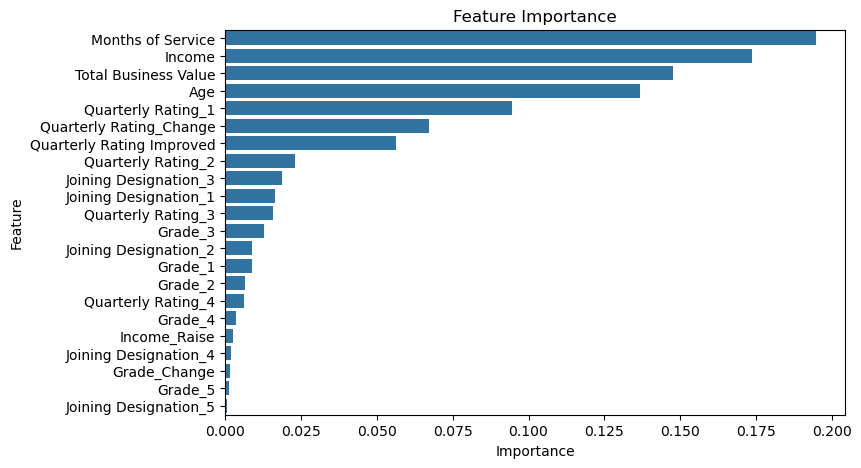

In [64]:
plot_feature_importance(rf_random.best_estimator_, X_train.columns)

### 6.3.2 Confusion Matrix

In [65]:
def display_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

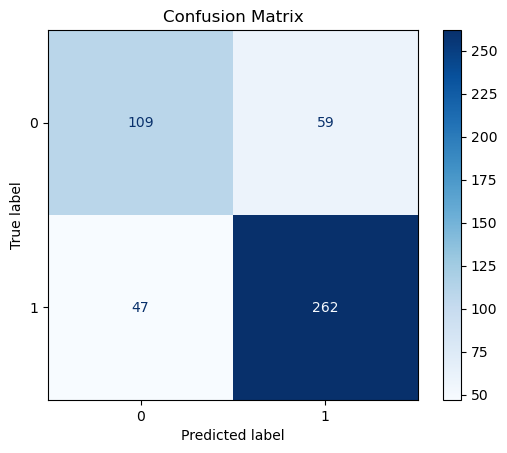

In [66]:
display_confusion_matrix(y_test, y_pred)

### 6.3.3 ROC Curve

In [67]:
def plot_roc_curve(estimator, X_train, X_test, y_train, y_test):
    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_binarized.shape[1]-1

    # Compute ROC curve and ROC area for each class
    classifier = OneVsRestClassifier(estimator)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(5, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()    

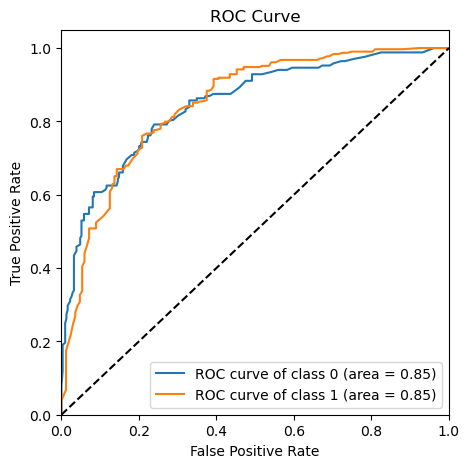

In [68]:
plot_roc_curve(rf_random.best_estimator_, X_train, X_test, y_train, y_test)

### 6.3.4 Precision-Recall Curve

In [69]:
def plot_pr_curve(estimator, X_train, X_test, y_train, y_test):
    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_binarized.shape[1]-1

    # Compute ROC curve and ROC area for each class
    classifier = OneVsRestClassifier(estimator)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

    # Plot Precision-Recall curve for each class
    plt.figure(figsize=(5, 5))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label='PR curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

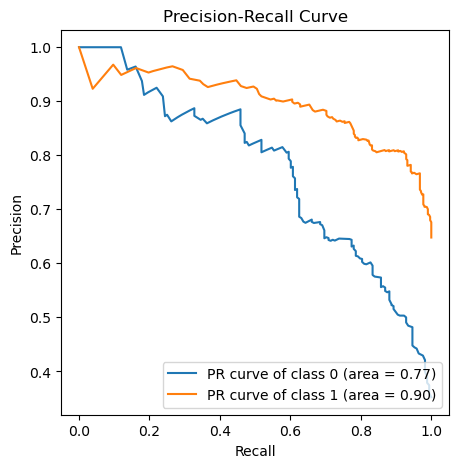

In [70]:
plot_pr_curve(rf_random.best_estimator_, X_train, X_test, y_train, y_test)

## Insight
- The **top 5 features** as per the RandomForestCLassifier are \
--**Months of Service \
--Income \
--Total Business Value \
--Age\
--Quarterly Rating 1**
- Both the classes 0 and 1 have a decent **Area Under the ROC** curve of **0.85**
- The **Area Under the PR** curve for class 0 is **0.77** and class 1 is **0.90**

## 6.4. Ensemble Learning: Boosting - GradientBoostingClassifier

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss.\
The hyper-parameters of the GradientBoostingClassifier will be selected using random search cross validation

In [71]:
# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 11, 1),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'subsample': np.linspace(0.5, 1.0, 6)
}

# Initialize classifier and RandomizedSearchCV
gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_grid,
                                n_iter=300, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
gb_random.fit(X_train, y_train)

# Evaluate best parameters
print("Best parameters found for GradientBoostingClassifier: ", gb_random.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best parameters found for GradientBoostingClassifier:  {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 10, 'learning_rate': 0.021544346900318832}


In [72]:
color = '\033[91m'
bold = '\033[1m'
end = '\033[0m'
# Predict and evaluate performance
y_true = y_train
y_pred = gb_random.predict(X_train)
print(color + bold + "Train data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))
y_true = y_test
y_pred = gb_random.predict(X_test)
print(color + bold + "Test data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Train data:
Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00      1307

    accuracy                           1.00      2614
   macro avg       1.00      1.00      1.00      2614
weighted avg       1.00      1.00      1.00      2614

Test data:
Accuracy:  0.7861635220125787
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       168
           1       0.81      0.87      0.84       309

    accuracy                           0.79       477
   macro avg       0.77      0.75      0.76       477
weighted avg       0.78      0.79      0.78       477



## Insight
- The training accuracy is 1 whereas testing accuracy is 0.786. This is also a case of **overfitting**.

### 6.4.1 Performance

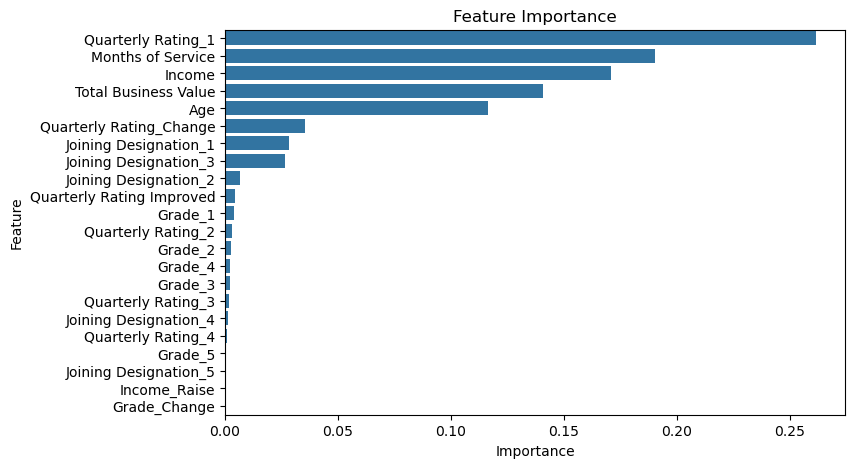

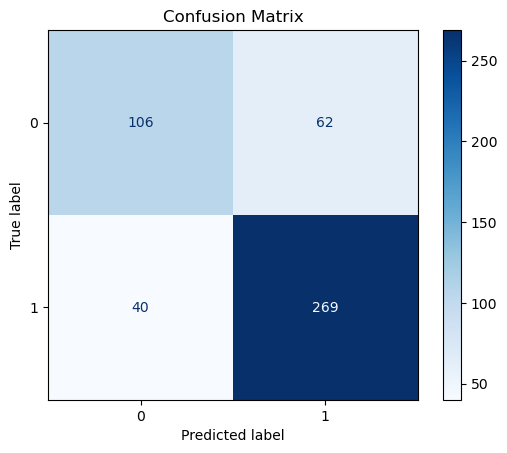

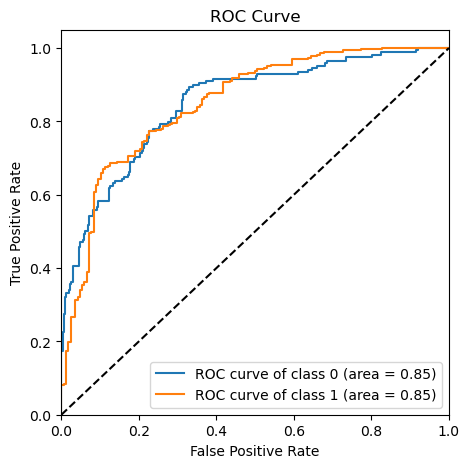

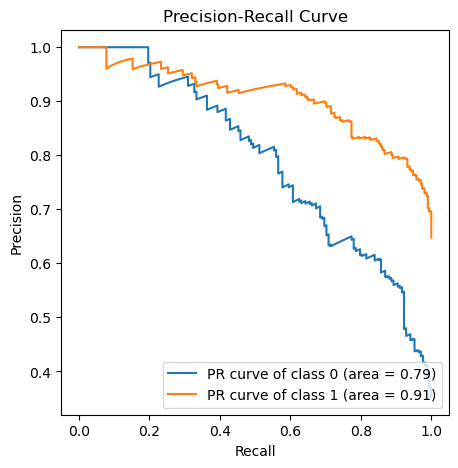

In [73]:
plot_feature_importance(gb_random.best_estimator_, X_train.columns)
display_confusion_matrix(y_test, y_pred)
plot_roc_curve(gb_random.best_estimator_, X_train, X_test, y_train, y_test)
plot_pr_curve(gb_random.best_estimator_, X_train, X_test, y_train, y_test)

## Insight
- The **top 5 features** as per the GradientBoostingClassifier are \
--**Quarterly Rating 1 \
--Months of Service \
--Income \
--Total Business Value \
--Age**
- Both the classes 0 and 1 have a decent **Area Under the ROC** curve of **0.85**
- The **Area Under the PR** curve for class 0 is **0.79** and class 1 is **0.91**

## 6.5. Ensemble Learning: Boosting - XGBClassifier

XGBClassifier is a highly optimized version of GBM. It includes regularization to prevent overfitting and various other enhancements.\
The hyper-parameters of the XGBClassifier will be selected using random search cross validation

In [74]:
# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 11, 1),
    'min_child_weight': np.arange(1, 11, 1),
    'gamma': np.logspace(-3, 1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6)
}


# Initialize classifier and RandomizedSearchCV
xgb = XGBClassifier(eval_metric='mlogloss')
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                n_iter=300, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
xgb_random.fit(X_train, y_train)

# Evaluate best parameters
print("Best parameters found for XGBoost: ", xgb_random.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best parameters found for XGBoost:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.046415888336127774, 'gamma': 0.007742636826811269, 'colsample_bytree': 0.5}


In [75]:
color = '\033[91m'
bold = '\033[1m'
end = '\033[0m'
# Predict and evaluate performance
y_true = y_train
y_pred = xgb_random.predict(X_train)
print(color + bold + "Train data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))
y_true = y_test
y_pred = xgb_random.predict(X_test)
print(color + bold + "Test data:" + color + end)
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Train data:
Accuracy:  0.9391736801836267
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1307
           1       0.92      0.96      0.94      1307

    accuracy                           0.94      2614
   macro avg       0.94      0.94      0.94      2614
weighted avg       0.94      0.94      0.94      2614

Test data:
Accuracy:  0.8134171907756813
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       168
           1       0.84      0.88      0.86       309

    accuracy                           0.81       477
   macro avg       0.80      0.78      0.79       477
weighted avg       0.81      0.81      0.81       477



## Insight
- The training accuracy has reduced to 0.939 whereas testing accuracy has slightly increased to 0.813. This is still a case of **overfitting** but better than all the previous models.
- This model is also faster than the previous models

### 6.5.1 Performance

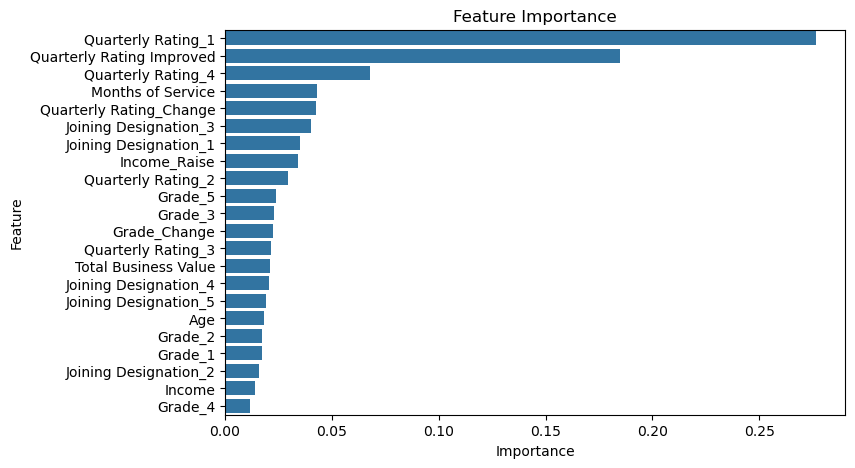

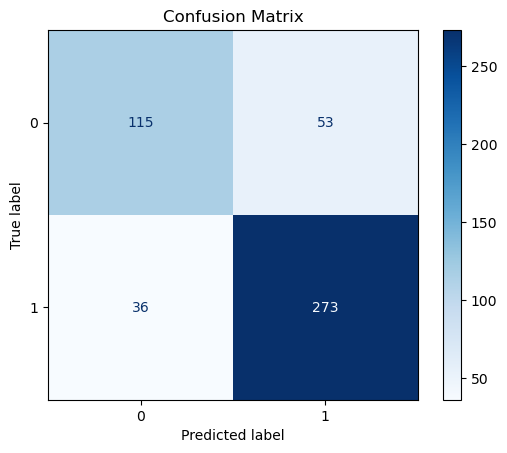

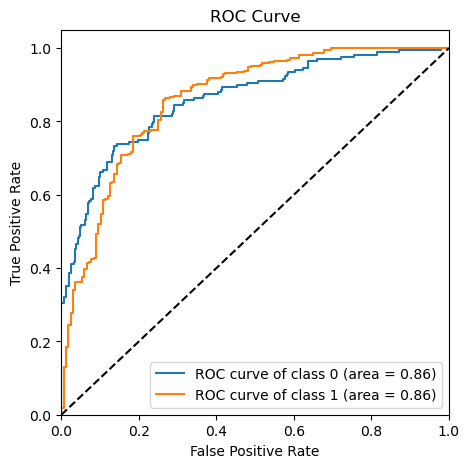

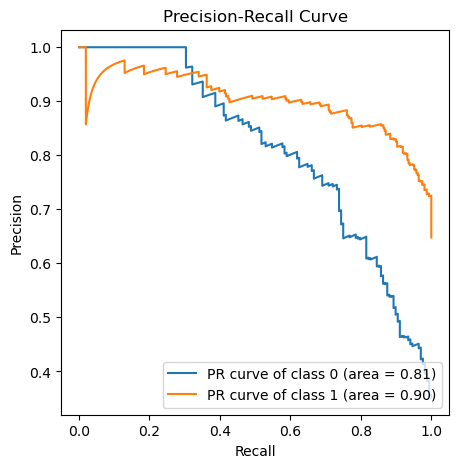

In [76]:
plot_feature_importance(xgb_random.best_estimator_, X_train.columns)
display_confusion_matrix(y_test, y_pred)
plot_roc_curve(xgb_random.best_estimator_, X_train, X_test, y_train, y_test)
plot_pr_curve(xgb_random.best_estimator_, X_train, X_test, y_train, y_test)

## Insight
- The **top 5 features** as per the XGBClassifier are \
--**Quarterly Rating 1 \
--Quarterly Rating Improved \
--Quarterly Rating 4 \
--Months of Service \
--Quarterly Rating_Change**\
- Both the classes 0 and 1 have a decent **Area Under the ROC** curve of **0.86**
- The **Area Under the PR** curve for class 0 is **0.81** and class 1 is **0.90**

# 7. Insights

- **Most** of the drivers are in the age group of **30 to 35**
- **59%** of the drivers are **Male** and remaining **41%** are **Female**
- City **C20** has the **maximum** number of **drivers**
- Maximum number of drivers joined in the year **2020** and in the month of **July**
- 1026 drivers have a **joining designation of 1**
- Maximum number of drivers have a **grade of 2**
- **Majority** of the drivers have a very **low quarterly rating of 1**
- There are **no drivers** with quarterly rating of **5**
- **1616** drivers have **churned**, which is around **68%**
- The **median income** of drivers who have **churned** is **lesser** than that of the drivers who have not churned
- The **churn rate** is **very less** in drivers whose **income has raised**
- The **churn rate** is **very less** in drivers whose **grade has raised**
- The **churn rate** is **very less** in drivers whose **Quarterly rating has increased**

 # 8. Recommendation

- The quartely rating has been the top contibutor on deciding if a driver will churn or not. As the ratings are given by the customers to the driver, Ola should urge all customers to rate the drivers on time. Ola should provide incentives/points to the customers to encourage timely rating.
- Ola should make sure that the income of deserving drivers should be increased every 6 months, if not every quarter, to encourage drivers to stay
- Long service awards/bonuses should be given to drivers to keep them motivated
- Special trainings should be given to drivers on how to handle different customers and different situations so that the customers always provide positive ratings

 # 9. Questionnaire

### 9.1 What percentage of drivers have received a quarterly rating of 5?
**Ans:** No drivers have received a quarterly rating of 5 
### 9.2 Comment on the correlation between Age and Quarterly Rating.
**Ans:** Age and Quarterly rating do not have much correlation. They have a small correlation value of 0.15
### 9.3 Name the city which showed the most improvement in Quarterly Rating over the past year
**Ans:** The city C29 shows  most improvement in Quarterly Rating in 2020 compared to 2019
### 9.4 Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)
**Ans:** Yes, the mean of Total Business Value of drivers with grade 5(or A) is higher than those with other grades
### 9.5 If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?
**Ans:** A significant drop in rating leads to dip in the Total Business Value in the subsequesnt period. Drop in rating demotivates the drivers, leading to accepting only a few rides or in somecases not accepting any rides and hence impacting the Total Business Value
### 9.6 From Ola's perspective, which metric should be the primary focus for driver retention? 1. ROC AUC, 2. Precision, 3. Recall, 4. F1 Score
**Ans:** Recall. It is ok if the model predicts most drivers as **Churn** but it should not predict **Churn** drivers as **Not Churn**
### 9.7 How does the gap in precision and recall affect Ola's relationship with its drivers and customers?
**Ans:** Gap in the precision and recall implies that the False Negatives and False Positives values are very different. If more instances of Churn are misclassified as Not Churn, then the customers may get drives who are not-motived/unsatisfied leading to bad customer experience. On the other hand if more instances of Not Churn are misclassified as Churn, then the good performing drivers will be neglected leading to driver dissatification.
### 9.8 Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?
**Ans:**
1) Customers not providing timely rating or providing false rating has a strong impact on high performing drivers and their quarterly rating.\
2) Lack of training to the driver on handling different situation can also impact their quarterly rating. Not all customers are same, so the driver needs to adapt his behaviour as per the customer.
### 9.9 Will the driver's performance be affected by the City they operate in? (Yes/No)
**Ans:** Yes, it might be the case that the people(customers) of a city are of a particular mindset. The people of a city could be more accomodative and provide good ratings always and people of a different city could get irriated easily and provide bad ratings
### 9.10 Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?
**Ans:** Yes, there is a seasonality in the driver's rating. The ratings dip in Q2 and then shoot up in Q3. This could be becuase of the holiday season in Q2 when many people move out of the cities for vacation and hence less usage of cabs.